In [1]:
# #Mounting google drive to colab Notebook
# from google.colab import drive

# drive.mount('/content/gdrive/', force_remount=True)

In [2]:
#Import all necessary libraries
import pandas as pd,numpy as np

from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.metrics.pairwise import linear_kernel
from gensim.models.word2vec import Word2Vec

import seaborn as sns
import matplotlib.pyplot as plt

import ast
from scipy import spatial

from sklearn.metrics.pairwise import cosine_similarity

import warnings
warnings.filterwarnings('ignore')

pd.options.display.max_rows

60

In [3]:
#Download NLTK libraries
import nltk
nltk.download("punkt")
nltk.download("stopwords")

[nltk_data] Error loading punkt: <urlopen error [WinError 10060] A
[nltk_data]     connection attempt failed because the connected party
[nltk_data]     did not properly respond after a period of time, or
[nltk_data]     established connection failed because connected host
[nltk_data]     has failed to respond>
[nltk_data] Error loading stopwords: <urlopen error [WinError 10060] A
[nltk_data]     connection attempt failed because the connected party
[nltk_data]     did not properly respond after a period of time, or
[nltk_data]     established connection failed because connected host
[nltk_data]     has failed to respond>


False

In [4]:
#Assigning file paths
path1  = "D:\\LJMU Thesis\\tmdb_5000_movies.csv"
path2  = "D:\\LJMU Thesis\\tmdb_5000_credits.csv"

In [5]:
# Load Dataset
df = pd.read_csv(path1)
df1 = pd.read_csv(path2)

In [6]:
print("shape of file1",df.shape)
print("shape of file2",df1.shape)

shape of file1 (4803, 20)
shape of file2 (4803, 4)


In [7]:
df1.head(1)

,movie_id,title,cast,crew
0,19995,Avatar,"[{""cast_id"": 242, ""character"": ""Jake Sully"", ""...","[{""credit_id"": ""52fe48009251416c750aca23"", ""de..."


In [8]:
print(f"Shape of dataset df is: {df.shape}, shape of dataset df1 is: {df1.shape}")

Shape of dataset df is: (4803, 20), shape of dataset df1 is: (4803, 4)


In [9]:
# Merging two dfs on title col
df = df.merge(df1,on = 'title', how = 'left')

In [10]:
print(f"Shape of dataset after merging both datasets: {df.shape}")
df.shape

Shape of dataset after merging both datasets: (4809, 23)


(4809, 23)

* TMDB dataset has 4803 Movies and 23 columns
* In Most of the cols we have list of dictionaries where we can extract more cols

In [11]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 4809 entries, 0 to 4808
Data columns (total 23 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   budget                4809 non-null   int64  
 1   genres                4809 non-null   object 
 2   homepage              1713 non-null   object 
 3   id                    4809 non-null   int64  
 4   keywords              4809 non-null   object 
 5   original_language     4809 non-null   object 
 6   original_title        4809 non-null   object 
 7   overview              4806 non-null   object 
 8   popularity            4809 non-null   float64
 9   production_companies  4809 non-null   object 
 10  production_countries  4809 non-null   object 
 11  release_date          4808 non-null   object 
 12  revenue               4809 non-null   int64  
 13  runtime               4807 non-null   float64
 14  spoken_languages      4809 non-null   object 
 15  status               

* Most of the categorical columns in the dataset are in json format.
* Data needs to be extracted and stored in Lists.


In [12]:
df['keywords'][0]              

'[{"id": 1463, "name": "culture clash"}, {"id": 2964, "name": "future"}, {"id": 3386, "name": "space war"}, {"id": 3388, "name": "space colony"}, {"id": 3679, "name": "society"}, {"id": 3801, "name": "space travel"}, {"id": 9685, "name": "futuristic"}, {"id": 9840, "name": "romance"}, {"id": 9882, "name": "space"}, {"id": 9951, "name": "alien"}, {"id": 10148, "name": "tribe"}, {"id": 10158, "name": "alien planet"}, {"id": 10987, "name": "cgi"}, {"id": 11399, "name": "marine"}, {"id": 13065, "name": "soldier"}, {"id": 14643, "name": "battle"}, {"id": 14720, "name": "love affair"}, {"id": 165431, "name": "anti war"}, {"id": 193554, "name": "power relations"}, {"id": 206690, "name": "mind and soul"}, {"id": 209714, "name": "3d"}]'

In [13]:
# Function written to convert columns 'genres','keywords','production_companies','production_countries','spoken_languages'
def convert(obj):
  L=[]
  for i in ast.literal_eval(obj):
    L.append(i['name'])
  return L

# def convert(obj):
#   return [i['name'] for i in ast.literal_eval(obj)]

In [14]:
#Applying convert function on genres col
df['genres'] = df['genres'].apply(convert)

In [15]:
df['genres'].head()

0    [Action, Adventure, Fantasy, Science Fiction]
1                     [Adventure, Fantasy, Action]
2                       [Action, Adventure, Crime]
3                 [Action, Crime, Drama, Thriller]
4             [Action, Adventure, Science Fiction]
Name: genres, dtype: object

In [16]:
df['keywords'].head()

0    [{"id": 1463, "name": "culture clash"}, {"id":...
1    [{"id": 270, "name": "ocean"}, {"id": 726, "na...
2    [{"id": 470, "name": "spy"}, {"id": 818, "name...
3    [{"id": 849, "name": "dc comics"}, {"id": 853,...
4    [{"id": 818, "name": "based on novel"}, {"id":...
Name: keywords, dtype: object

In [17]:
#Applying convert function on keywords col
df['keywords'] = df['keywords'].apply(convert)

In [18]:
#Applying convert function on production_companies col
df['production_companies'] = df['production_companies'].apply(convert)

In [19]:
#Applying convert function on production_countries col
df['production_countries'] = df['production_countries'].apply(convert)

In [20]:
#Applying convert function on spoken_languages col
df['spoken_languages'] = df['spoken_languages'].apply(convert)

In [21]:
df['keywords'].head()

0    [culture clash, future, space war, space colon...
1    [ocean, drug abuse, exotic island, east india ...
2    [spy, based on novel, secret agent, sequel, mi...
3    [dc comics, crime fighter, terrorist, secret i...
4    [based on novel, mars, medallion, space travel...
Name: keywords, dtype: object

In [22]:
#function to get cast col
def get_cast(obj):
  get_list  = [i['name'] for i in ast.literal_eval(obj) if i['order'] <=3]
  return get_list

In [23]:
#Applying convert function on cast col
df['cast'] = df['cast'].apply(get_cast)

In [24]:
df['cast'][0]

['Sam Worthington', 'Zoe Saldana', 'Sigourney Weaver', 'Stephen Lang']

In [25]:
#Functions to extract actors in sepearte cols
def get_actor1(obj):
  if len(obj) == 0:
    return 'NAN'
  else:
    return obj[0]

def get_actor2(obj):
  if len(obj) <= 1:
    return 'NAN'
  else:
    return obj[1]

def get_actor3(obj):
  if len(obj) <=2:
    return 'NAN'
  else:
    return obj[2]


df['Actor1'] = df['cast'].apply(get_actor1)
df['Actor2'] = df['cast'].apply(get_actor2)
df['Actor3'] = df['cast'].apply(get_actor3)

In [26]:
df['crew'][1]

'[{"credit_id": "52fe4232c3a36847f800b579", "department": "Camera", "gender": 2, "id": 120, "job": "Director of Photography", "name": "Dariusz Wolski"}, {"credit_id": "52fe4232c3a36847f800b4fd", "department": "Directing", "gender": 2, "id": 1704, "job": "Director", "name": "Gore Verbinski"}, {"credit_id": "52fe4232c3a36847f800b54f", "department": "Production", "gender": 2, "id": 770, "job": "Producer", "name": "Jerry Bruckheimer"}, {"credit_id": "52fe4232c3a36847f800b503", "department": "Writing", "gender": 2, "id": 1705, "job": "Screenplay", "name": "Ted Elliott"}, {"credit_id": "52fe4232c3a36847f800b509", "department": "Writing", "gender": 2, "id": 1706, "job": "Screenplay", "name": "Terry Rossio"}, {"credit_id": "52fe4232c3a36847f800b57f", "department": "Editing", "gender": 0, "id": 1721, "job": "Editor", "name": "Stephen E. Rivkin"}, {"credit_id": "52fe4232c3a36847f800b585", "department": "Editing", "gender": 2, "id": 1722, "job": "Editor", "name": "Craig Wood"}, {"credit_id": "52f

In [27]:
get_directors = lambda x: [i['name'] for i in ast.literal_eval(x) if i['job'] == 'Director'] # function to extract director

In [28]:
df['Director']=df['crew'].apply(get_directors) #Apply above function on crew col

In [29]:
df['Director'].head()

0        [James Cameron]
1       [Gore Verbinski]
2           [Sam Mendes]
3    [Christopher Nolan]
4       [Andrew Stanton]
Name: Director, dtype: object

In [30]:
#get year of relaease and montn of release in sepearte col
df['release_date'][0]
df['year'] = pd.to_datetime(df['release_date']).dt.year
df['month'] = pd.to_datetime(df['release_date']).dt.month
df['month'][0]

12.0

In [31]:
df.head()

,budget,genres,homepage,id,keywords,original_language,original_title,overview,popularity,production_companies,...,vote_count,movie_id,cast,crew,Actor1,Actor2,Actor3,Director,year,month
0,237000000,"[Action, Adventure, Fantasy, Science Fiction]",http://www.avatarmovie.com/,19995,"[culture clash, future, space war, space colon...",en,Avatar,"In the 22nd century, a paraplegic Marine is di...",150.437577,"[Ingenious Film Partners, Twentieth Century Fo...",...,11800,19995,"[Sam Worthington, Zoe Saldana, Sigourney Weave...","[{""credit_id"": ""52fe48009251416c750aca23"", ""de...",Sam Worthington,Zoe Saldana,Sigourney Weaver,[James Cameron],2009.0,12.0
1,300000000,"[Adventure, Fantasy, Action]",http://disney.go.com/disneypictures/pirates/,285,"[ocean, drug abuse, exotic island, east india ...",en,Pirates of the Caribbean: At World's End,"Captain Barbossa, long believed to be dead, ha...",139.082615,"[Walt Disney Pictures, Jerry Bruckheimer Films...",...,4500,285,"[Johnny Depp, Orlando Bloom, Keira Knightley, ...","[{""credit_id"": ""52fe4232c3a36847f800b579"", ""de...",Johnny Depp,Orlando Bloom,Keira Knightley,[Gore Verbinski],2007.0,5.0
2,245000000,"[Action, Adventure, Crime]",http://www.sonypictures.com/movies/spectre/,206647,"[spy, based on novel, secret agent, sequel, mi...",en,Spectre,A cryptic message from Bond’s past sends him o...,107.376788,"[Columbia Pictures, Danjaq, B24]",...,4466,206647,"[Daniel Craig, Christoph Waltz, Léa Seydoux, R...","[{""credit_id"": ""54805967c3a36829b5002c41"", ""de...",Daniel Craig,Christoph Waltz,Léa Seydoux,[Sam Mendes],2015.0,10.0
3,250000000,"[Action, Crime, Drama, Thriller]",http://www.thedarkknightrises.com/,49026,"[dc comics, crime fighter, terrorist, secret i...",en,The Dark Knight Rises,Following the death of District Attorney Harve...,112.312950,"[Legendary Pictures, Warner Bros., DC Entertai...",...,9106,49026,"[Christian Bale, Michael Caine, Gary Oldman, A...","[{""credit_id"": ""52fe4781c3a36847f81398c3"", ""de...",Christian Bale,Michael Caine,Gary Oldman,[Christopher Nolan],2012.0,7.0
4,260000000,"[Action, Adventure, Science Fiction]",http://movies.disney.com/john-carter,49529,"[based on novel, mars, medallion, space travel...",en,John Carter,"John Carter is a war-weary, former military ca...",43.926995,[Walt Disney Pictures],...,2124,49529,"[Taylor Kitsch, Lynn Collins, Samantha Morton,...","[{""credit_id"": ""52fe479ac3a36847f813eaa3"", ""de...",Taylor Kitsch,Lynn Collins,Samantha Morton,[Andrew Stanton],2012.0,3.0


In [32]:
df.isnull().sum()

budget                     0
genres                     0
homepage                3096
id                         0
keywords                   0
original_language          0
original_title             0
overview                   3
popularity                 0
production_companies       0
production_countries       0
release_date               1
revenue                    0
runtime                    2
spoken_languages           0
status                     0
tagline                  844
title                      0
vote_average               0
vote_count                 0
movie_id                   0
cast                       0
crew                       0
Actor1                     0
Actor2                     0
Actor3                     0
Director                   0
year                       1
month                      1
dtype: int64

* Dropping the Columns homepage and tagline have lot of missing values


In [33]:
df  = df.drop(columns= ['homepage','tagline'])
df.isnull().sum()

budget                  0
genres                  0
id                      0
keywords                0
original_language       0
original_title          0
overview                3
popularity              0
production_companies    0
production_countries    0
release_date            1
revenue                 0
runtime                 2
spoken_languages        0
status                  0
title                   0
vote_average            0
vote_count              0
movie_id                0
cast                    0
crew                    0
Actor1                  0
Actor2                  0
Actor3                  0
Director                0
year                    1
month                   1
dtype: int64

In [34]:
#Dropping remaning missing rows
df= df.dropna()
df.isnull().sum()

budget                  0
genres                  0
id                      0
keywords                0
original_language       0
original_title          0
overview                0
popularity              0
production_companies    0
production_countries    0
release_date            0
revenue                 0
runtime                 0
spoken_languages        0
status                  0
title                   0
vote_average            0
vote_count              0
movie_id                0
cast                    0
crew                    0
Actor1                  0
Actor2                  0
Actor3                  0
Director                0
year                    0
month                   0
dtype: int64

In [35]:
df.head()

,budget,genres,id,keywords,original_language,original_title,overview,popularity,production_companies,production_countries,...,vote_count,movie_id,cast,crew,Actor1,Actor2,Actor3,Director,year,month
0,237000000,"[Action, Adventure, Fantasy, Science Fiction]",19995,"[culture clash, future, space war, space colon...",en,Avatar,"In the 22nd century, a paraplegic Marine is di...",150.437577,"[Ingenious Film Partners, Twentieth Century Fo...","[United States of America, United Kingdom]",...,11800,19995,"[Sam Worthington, Zoe Saldana, Sigourney Weave...","[{""credit_id"": ""52fe48009251416c750aca23"", ""de...",Sam Worthington,Zoe Saldana,Sigourney Weaver,[James Cameron],2009.0,12.0
1,300000000,"[Adventure, Fantasy, Action]",285,"[ocean, drug abuse, exotic island, east india ...",en,Pirates of the Caribbean: At World's End,"Captain Barbossa, long believed to be dead, ha...",139.082615,"[Walt Disney Pictures, Jerry Bruckheimer Films...",[United States of America],...,4500,285,"[Johnny Depp, Orlando Bloom, Keira Knightley, ...","[{""credit_id"": ""52fe4232c3a36847f800b579"", ""de...",Johnny Depp,Orlando Bloom,Keira Knightley,[Gore Verbinski],2007.0,5.0
2,245000000,"[Action, Adventure, Crime]",206647,"[spy, based on novel, secret agent, sequel, mi...",en,Spectre,A cryptic message from Bond’s past sends him o...,107.376788,"[Columbia Pictures, Danjaq, B24]","[United Kingdom, United States of America]",...,4466,206647,"[Daniel Craig, Christoph Waltz, Léa Seydoux, R...","[{""credit_id"": ""54805967c3a36829b5002c41"", ""de...",Daniel Craig,Christoph Waltz,Léa Seydoux,[Sam Mendes],2015.0,10.0
3,250000000,"[Action, Crime, Drama, Thriller]",49026,"[dc comics, crime fighter, terrorist, secret i...",en,The Dark Knight Rises,Following the death of District Attorney Harve...,112.312950,"[Legendary Pictures, Warner Bros., DC Entertai...",[United States of America],...,9106,49026,"[Christian Bale, Michael Caine, Gary Oldman, A...","[{""credit_id"": ""52fe4781c3a36847f81398c3"", ""de...",Christian Bale,Michael Caine,Gary Oldman,[Christopher Nolan],2012.0,7.0
4,260000000,"[Action, Adventure, Science Fiction]",49529,"[based on novel, mars, medallion, space travel...",en,John Carter,"John Carter is a war-weary, former military ca...",43.926995,[Walt Disney Pictures],[United States of America],...,2124,49529,"[Taylor Kitsch, Lynn Collins, Samantha Morton,...","[{""credit_id"": ""52fe479ac3a36847f813eaa3"", ""de...",Taylor Kitsch,Lynn Collins,Samantha Morton,[Andrew Stanton],2012.0,3.0


In [36]:
# Creating New Cols by counting No. of genres for a Movie and No. of genres

df['No_of_Genres'] = df['genres'].apply(lambda x: len(x))

df[['genres','No_of_Genres']].head()


,genres,No_of_Genres
0,"[Action, Adventure, Fantasy, Science Fiction]",4
1,"[Adventure, Fantasy, Action]",3
2,"[Action, Adventure, Crime]",3
3,"[Action, Crime, Drama, Thriller]",4
4,"[Action, Adventure, Science Fiction]",3


In [37]:
# Creating New Col by counting No. of keywords for a Movie
df['No_of_keywords'] = df['keywords'].apply(lambda x: len(x))

df[['keywords','No_of_keywords']].head()

,keywords,No_of_keywords
0,"[culture clash, future, space war, space colon...",21
1,"[ocean, drug abuse, exotic island, east india ...",16
2,"[spy, based on novel, secret agent, sequel, mi...",7
3,"[dc comics, crime fighter, terrorist, secret i...",21
4,"[based on novel, mars, medallion, space travel...",16


In [38]:
# Creating New Col by counting No. of words in 'Overview' col

df['overview_word_count'] = df['overview'].apply(lambda x: len(x.split()))

df.head()

,budget,genres,id,keywords,original_language,original_title,overview,popularity,production_companies,production_countries,...,crew,Actor1,Actor2,Actor3,Director,year,month,No_of_Genres,No_of_keywords,overview_word_count
0,237000000,"[Action, Adventure, Fantasy, Science Fiction]",19995,"[culture clash, future, space war, space colon...",en,Avatar,"In the 22nd century, a paraplegic Marine is di...",150.437577,"[Ingenious Film Partners, Twentieth Century Fo...","[United States of America, United Kingdom]",...,"[{""credit_id"": ""52fe48009251416c750aca23"", ""de...",Sam Worthington,Zoe Saldana,Sigourney Weaver,[James Cameron],2009.0,12.0,4,21,28
1,300000000,"[Adventure, Fantasy, Action]",285,"[ocean, drug abuse, exotic island, east india ...",en,Pirates of the Caribbean: At World's End,"Captain Barbossa, long believed to be dead, ha...",139.082615,"[Walt Disney Pictures, Jerry Bruckheimer Films...",[United States of America],...,"[{""credit_id"": ""52fe4232c3a36847f800b579"", ""de...",Johnny Depp,Orlando Bloom,Keira Knightley,[Gore Verbinski],2007.0,5.0,3,16,34
2,245000000,"[Action, Adventure, Crime]",206647,"[spy, based on novel, secret agent, sequel, mi...",en,Spectre,A cryptic message from Bond’s past sends him o...,107.376788,"[Columbia Pictures, Danjaq, B24]","[United Kingdom, United States of America]",...,"[{""credit_id"": ""54805967c3a36829b5002c41"", ""de...",Daniel Craig,Christoph Waltz,Léa Seydoux,[Sam Mendes],2015.0,10.0,3,7,41
3,250000000,"[Action, Crime, Drama, Thriller]",49026,"[dc comics, crime fighter, terrorist, secret i...",en,The Dark Knight Rises,Following the death of District Attorney Harve...,112.312950,"[Legendary Pictures, Warner Bros., DC Entertai...",[United States of America],...,"[{""credit_id"": ""52fe4781c3a36847f81398c3"", ""de...",Christian Bale,Michael Caine,Gary Oldman,[Christopher Nolan],2012.0,7.0,4,21,65
4,260000000,"[Action, Adventure, Science Fiction]",49529,"[based on novel, mars, medallion, space travel...",en,John Carter,"John Carter is a war-weary, former military ca...",43.926995,[Walt Disney Pictures],[United States of America],...,"[{""credit_id"": ""52fe479ac3a36847f813eaa3"", ""de...",Taylor Kitsch,Lynn Collins,Samantha Morton,[Andrew Stanton],2012.0,3.0,3,16,55


## **Exploratory Data Analysis**

### **1. Genres & Keywords**

In [39]:
df['keywords'][0][0]

'culture clash'

In [40]:
def get_each(obj):
  keywords= []
  for keyword in obj:
    for i in keyword:
      keywords.append(i)


  return keywords


In [41]:
total_genres = get_each(df['genres'])


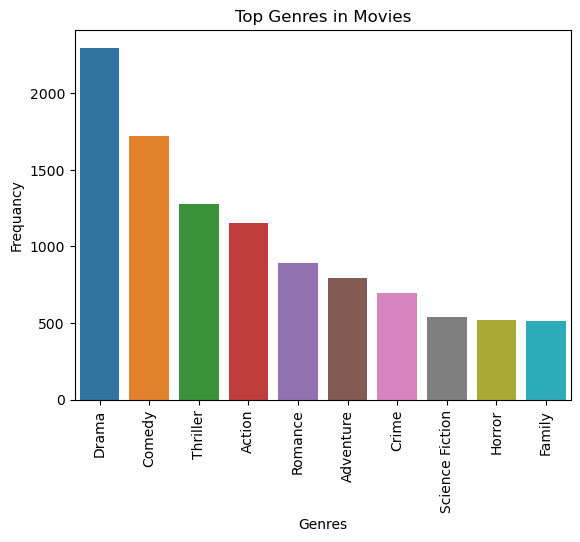

In [42]:
import matplotlib.pyplot as plt

from collections import Counter
sns.barplot(x = pd.DataFrame(Counter(total_genres).most_common(10))[0],y = pd.DataFrame(Counter(total_genres).most_common(10))[1])
plt.xticks(rotation = 'vertical')
plt.xlabel('Genres')
plt.ylabel('Frequancy')
plt.title('Top Genres in Movies')
plt.show()


* 'Drama' is the Genre that is most movies in the dataset have and followed by Comedy, Thriler and Action

In [43]:
pd.DataFrame(total_genres)

,0
0,Action
1,Adventure
2,Fantasy
3,Science Fiction
4,Adventure
...,...
12169,Comedy
12170,Drama
12171,Romance
12172,TV Movie


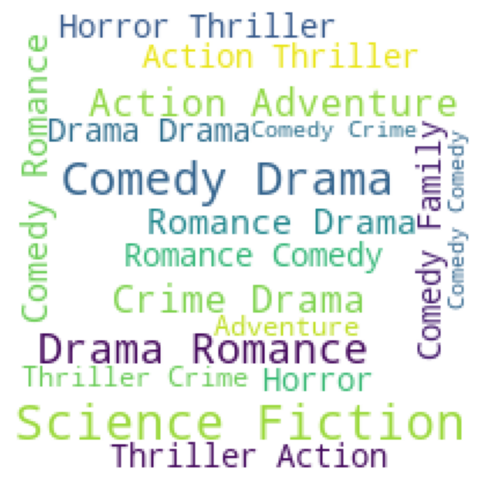

In [44]:
from wordcloud import WordCloud
wc = WordCloud(width = 200, height = 200, min_font_size =10, background_color = 'white')
genre_wc = wc.generate(pd.DataFrame(total_genres)[0].str.cat(sep=" "))
# Display the WordCloud image
plt.figure(figsize=(12, 6))
plt.imshow(genre_wc)
plt.axis('off')  # Turn off axis labels
plt.show()

Text(0.5, 1.0, 'No of  Genres per Movies')

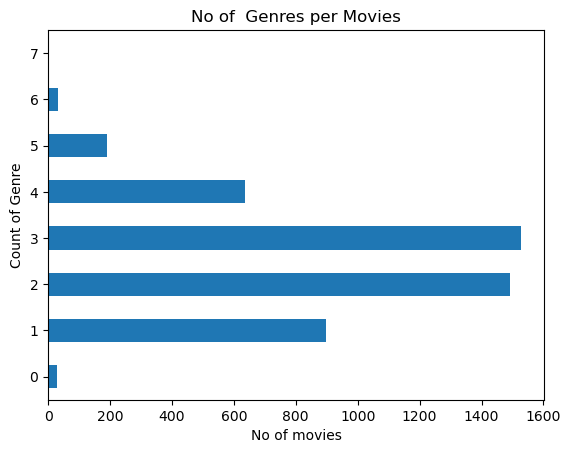

In [45]:
df['No_of_Genres'].value_counts().sort_index().plot(kind='barh')
plt.xlabel('No of movies')
plt.ylabel('Count of Genre')
plt.title('No of  Genres per Movies')

* The predominant genre in the dataset is 'Drama,' with a substantial majority of movies falling into this category. Following closely are Comedy, Thriller, and Action genres.

* A notable observation is that a significant portion of movies in the dataset falls under the multi-genre category. Additionally, there are instances where the Genre column is missing for some movies.

* When examining the distribution, it becomes evident that the most common scenario is movies having three genres, with two and four genres per movie being the subsequent prevalent occurrences.

In [46]:
total_keywords = get_each(df['keywords'])



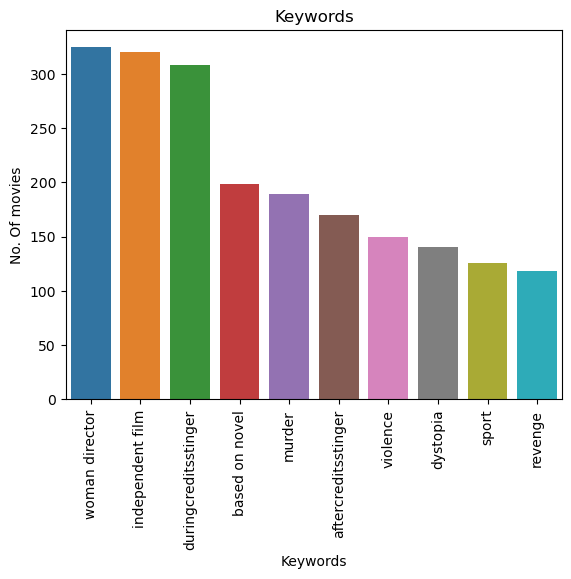

In [47]:
sns.barplot(x = pd.DataFrame(Counter(total_keywords).most_common(10))[0],y = pd.DataFrame(Counter(total_keywords).most_common(10))[1])
plt.xlabel('Keywords')
plt.ylabel('No. Of movies')
plt.title('Keywords')

plt.xticks(rotation = 'vertical')
plt.show()

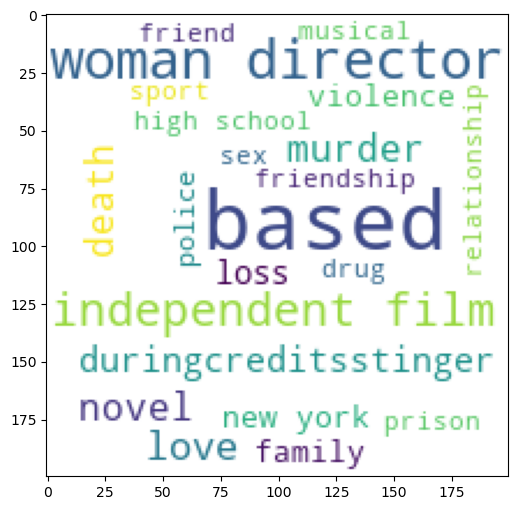

In [48]:
keywords_wc = wc.generate(pd.DataFrame(total_keywords)[0].str.cat(sep=" "))
# Display the WordCloud image
plt.figure(figsize=(12, 6))
plt.imshow(keywords_wc)
#plt.axis('off')  # Turn off axis labels
plt.show()

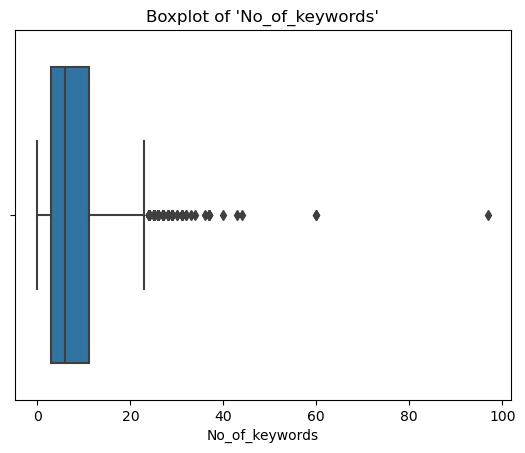

In [49]:
import seaborn as sns


sns.boxplot(x=df['No_of_keywords'])

# Add labels and a title
plt.xlabel("No_of_keywords")
plt.title("Boxplot of 'No_of_keywords'")

# Show the plot
plt.show()

* The most frequently used keywords in the dataset are 'Women Director,' 'independent film,' and 'duringcreditsstinger.'

* The number of keywords in the dataset varies widely, ranging from 0 to 95.

### **2. Popularity & Ratings**

In [50]:
df['popularity'].describe()

count    4805.000000
mean       21.509226
std        31.810774
min         0.000372
25%         4.682881
50%        12.929525
75%        28.350927
max       875.581305
Name: popularity, dtype: float64

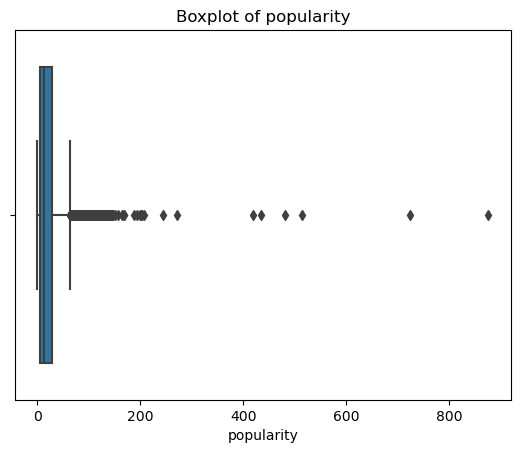

In [51]:
import seaborn as sns


sns.boxplot(x=df['popularity'])

# Add labels and a title
plt.xlabel("popularity")
plt.title("Boxplot of popularity")

# Show the plot
plt.show()

Text(0.5, 1.0, 'Distribution of Ratings')

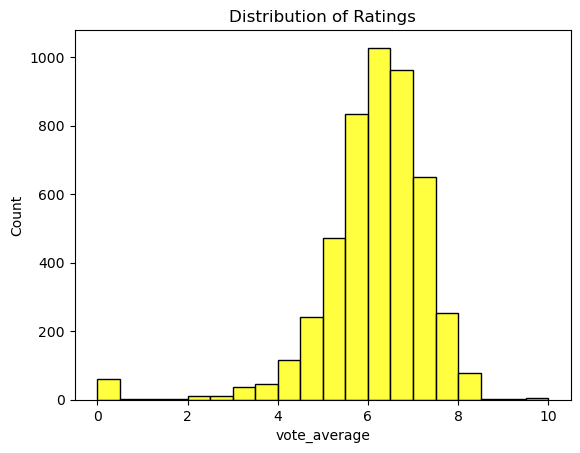

In [52]:
sns.histplot(df['vote_average'],bins=20, kde=False, color='yellow')
plt.title("Distribution of Ratings")


### **3. Budget & Revenue**

In [53]:
df['budget_in_mn'] = df['budget'].apply(lambda x : x/1000000)

df['budget_in_mn'].describe()


count    4805.000000
mean       29.048656
std        40.714838
min         0.000000
25%         0.800000
50%        15.000000
75%        40.000000
max       380.000000
Name: budget_in_mn, dtype: float64

In [54]:
df[df['budget_in_mn']==380]

,budget,genres,id,keywords,original_language,original_title,overview,popularity,production_companies,production_countries,...,Actor1,Actor2,Actor3,Director,year,month,No_of_Genres,No_of_keywords,overview_word_count,budget_in_mn
17,380000000,"[Adventure, Action, Fantasy]",1865,"[sea, captain, mutiny, sword, prime minister, ...",en,Pirates of the Caribbean: On Stranger Tides,Captain Jack Sparrow crosses paths with a woma...,135.413856,"[Walt Disney Pictures, Jerry Bruckheimer Films...",[United States of America],...,Johnny Depp,Penélope Cruz,Ian McShane,[Rob Marshall],2011.0,5.0,3,16,75,380.0


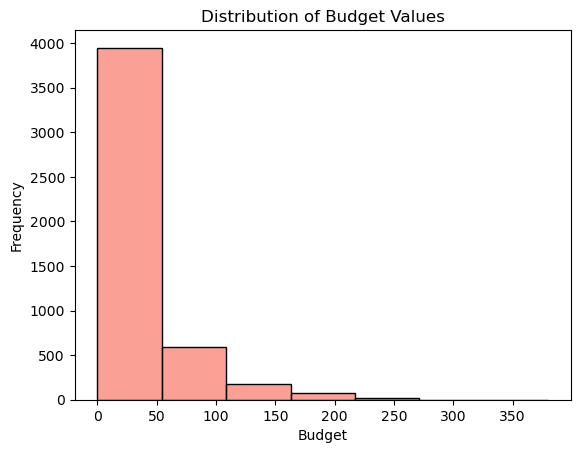

In [55]:
colors = ["skyblue", "salmon", "lightgreen", "orange"]
sns.histplot(df['budget_in_mn'], bins=7, kde=False,color='salmon')
plt.title('Distribution of Budget Values')
plt.xlabel('Budget')
plt.ylabel('Frequency')
plt.show()

* The highest budget allocation is attributed to "Pirates of the Caribbean: On Stranger Tides" amounting to a staggering $380 million.

* On average, movie budgets in the dataset hover around $30 million.

* Notably, over 75% of the dataset comprises movies with budgets below $50 million.






In [56]:
df['revenue_in_mn'] = df['revenue'].apply(lambda x : x/1000000)

df['revenue_in_mn'].describe()

count    4805.000000
mean       82.343603
std       162.888318
min         0.000000
25%         0.000000
50%        19.184015
75%        92.921203
max      2787.965087
Name: revenue_in_mn, dtype: float64

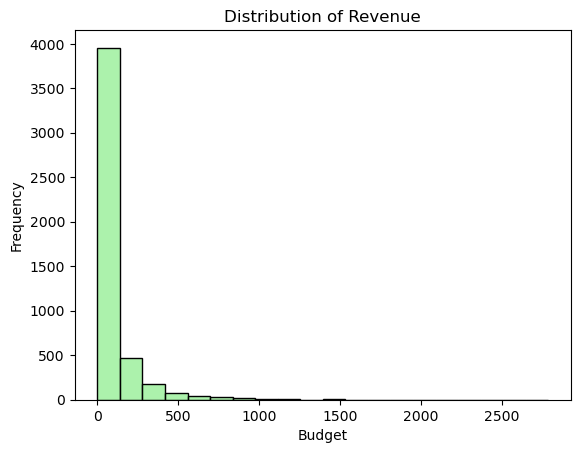

In [57]:
colors = ["skyblue", "salmon", "lightgreen", "orange"]
sns.histplot(df['revenue_in_mn'], bins=20, kde=False, color='lightgreen')
plt.title('Distribution of Revenue')
plt.xlabel('Budget')
plt.ylabel('Frequency')
plt.show()

In [58]:
df[df['revenue_in_mn'] >1800]

,budget,genres,id,keywords,original_language,original_title,overview,popularity,production_companies,production_countries,...,Actor2,Actor3,Director,year,month,No_of_Genres,No_of_keywords,overview_word_count,budget_in_mn,revenue_in_mn
0,237000000,"[Action, Adventure, Fantasy, Science Fiction]",19995,"[culture clash, future, space war, space colon...",en,Avatar,"In the 22nd century, a paraplegic Marine is di...",150.437577,"[Ingenious Film Partners, Twentieth Century Fo...","[United States of America, United Kingdom]",...,Zoe Saldana,Sigourney Weaver,[James Cameron],2009.0,12.0,4,21,28,237.0,2787.965087
25,200000000,"[Drama, Romance, Thriller]",597,"[shipwreck, iceberg, ship, panic, titanic, oce...",en,Titanic,"84 years later, a 101-year-old woman named Ros...",100.025899,"[Paramount Pictures, Twentieth Century Fox Fil...",[United States of America],...,Leonardo DiCaprio,Frances Fisher,[James Cameron],1997.0,11.0,3,19,116,200.0,1845.034188


* Avatar is the Highest Grossing movie in the dataset with total collection   of $ 2.7bn. Second Highest being 'Titanic with 1.8Bn '

* It is the only movie in the dataset with over $2bn collections

* Collections of Most movies in the Datset are below $150mn

### **Runtime**

In [59]:
df['runtime'].describe()

count    4805.000000
mean      106.909469
std        22.551937
min         0.000000
25%        94.000000
50%       104.000000
75%       118.000000
max       338.000000
Name: runtime, dtype: float64

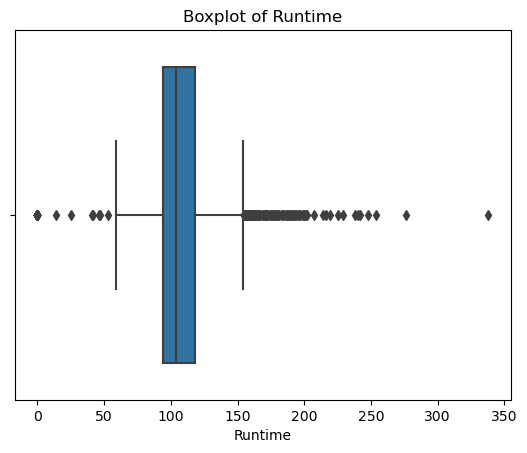

In [60]:
sns.boxplot(x=df['runtime'])

# Add labels and a title
plt.xlabel("Runtime")
plt.title("Boxplot of Runtime")

# Show the plot
plt.show()

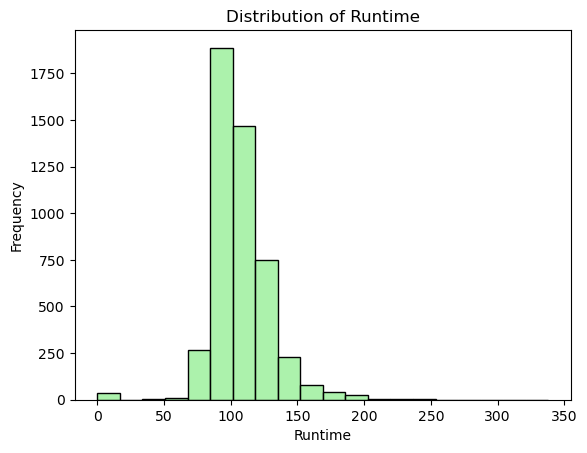

In [61]:
sns.histplot(df['runtime'], bins=20, kde=False, color='lightgreen')
plt.title('Distribution of Runtime')
plt.xlabel('Runtime')
plt.ylabel('Frequency')
plt.show()

* Average Runtime of Movies in the Datset is above 106 Mins.
* Most movies in the Dataset have more than 90 Mins runtime

### **Original language**

In [62]:
df['original_language'].value_counts()


en    4508
fr      70
es      32
zh      27
de      26
hi      19
ja      16
it      13
ko      12
cn      12
ru      11
pt       9
da       7
sv       5
nl       4
fa       4
th       3
he       3
ta       2
cs       2
ro       2
id       2
ar       2
vi       1
sl       1
ps       1
no       1
ky       1
hu       1
pl       1
af       1
nb       1
tr       1
is       1
xx       1
te       1
el       1
Name: original_language, dtype: int64

In [63]:
# Let us make languages with less than 20 movies as others
language_counts = df['original_language'].apply(lambda x: x if  x == 'en' else 'others')


language_counts.value_counts()

en        4508
others     297
Name: original_language, dtype: int64

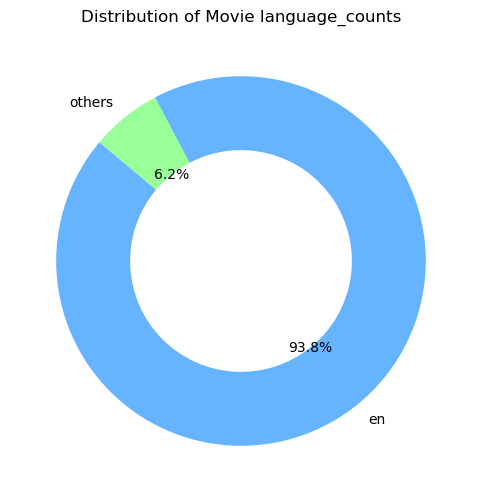

In [64]:
# Plotting a Original language
plt.figure(figsize=(10, 6))
plt.pie(language_counts.value_counts(), labels=language_counts.value_counts().index, autopct='%1.1f%%', startangle=140, wedgeprops=dict(width=0.4), colors=['#66b3ff','#99ff99'])
plt.title('Distribution of Movie language_counts')
plt.show()

* Almost 94% of the Movies are originally made in english followed by french
* Movies from all other languages comprises only 6%

In [65]:
df_sorted = df.sort_values(by='vote_count')

# Filter the top 250 rows based on 'Rank'
top_250 = df_sorted.tail(250)

# Display the top 250 rows
top_250.head()

,budget,genres,id,keywords,original_language,original_title,overview,popularity,production_companies,production_countries,...,Actor2,Actor3,Director,year,month,No_of_Genres,No_of_keywords,overview_word_count,budget_in_mn,revenue_in_mn
2969,10500000,"[Science Fiction, Mystery, Adventure]",62,"[moon, jupiter, artificial intelligence, man v...",en,2001: A Space Odyssey,Humanity finds a mysterious object buried bene...,86.201184,"[Stanley Kubrick Productions, Metro-Goldwyn-Ma...","[United States of America, United Kingdom]",...,Gary Lockwood,William Sylvester,[Stanley Kubrick],1968.0,4.0,3,14,29,10.5,68.700000
717,60000000,"[Crime, Drama, Thriller]",75780,"[based on novel, sniper, investigation, police...",en,Jack Reacher,"In an innocent heartland city, five are shot d...",56.868399,"[Paramount Pictures, Mutual Film Company, Skyd...",[United States of America],...,Rosamund Pike,Richard Jenkins,[Christopher McQuarrie],2012.0,12.0,3,5,91,60.0,218.340595
1831,25000000,"[Crime, Drama, Thriller]",6977,"[texas, drug traffic, hitman, united states–me...",en,No Country for Old Men,"Llewelyn Moss stumbles upon dead bodies, $2 mi...",53.645267,"[Miramax Films, Scott Rudin Productions, Param...",[United States of America],...,Javier Bardem,Josh Brolin,"[Joel Coen, Ethan Coen]",2007.0,11.0,3,5,52,25.0,171.600000
493,60000000,"[Drama, Romance]",453,"[individual, schizophrenia, massachusetts, lov...",en,A Beautiful Mind,"At Princeton University, John Nash struggles t...",59.248437,"[Imagine Entertainment, DreamWorks SKG, Univer...",[United States of America],...,Ed Harris,Jennifer Connelly,[Ron Howard],2001.0,12.0,2,14,115,60.0,313.542341
423,80000000,"[Fantasy, Comedy]",310,"[christianity, moon, responsability, moses, st...",en,Bruce Almighty,"Bruce Nolan toils as a ""human interest"" televi...",109.684788,"[Universal Pictures, Spyglass Entertainment, S...",[United States of America],...,Jennifer Aniston,Philip Baker Hall,[Tom Shadyac],2003.0,5.0,2,12,54,80.0,484.572835


In [66]:
top_250[['original_title','popularity','vote_count','vote_average','revenue']][top_250['popularity']>28]

,original_title,popularity,vote_count,vote_average,revenue
2969,2001: A Space Odyssey,86.201184,2998,7.9,68700000
717,Jack Reacher,56.868399,2998,6.3,218340595
1831,No Country for Old Men,53.645267,3003,7.7,171600000
493,A Beautiful Mind,59.248437,3009,7.7,313542341
423,Bruce Almighty,109.684788,3012,6.4,484572835
...,...,...,...,...,...
788,Deadpool,514.569956,10995,7.4,783112979
16,The Avengers,144.448633,11776,7.4,1519557910
0,Avatar,150.437577,11800,7.2,2787965087
65,The Dark Knight,187.322927,12002,8.2,1004558444


In [67]:
top_250['popularity'].quantile(q=[0.25, 0.50, 0.75, 0.99, 1])


0.25     61.410152
0.50     80.597534
0.75    109.358834
0.99    498.169003
1.00    875.581305
Name: popularity, dtype: float64

In [68]:
top_250['popularity'].mean()

98.46753973199998

In [69]:
df['popularity'].mean()

21.509225519667044

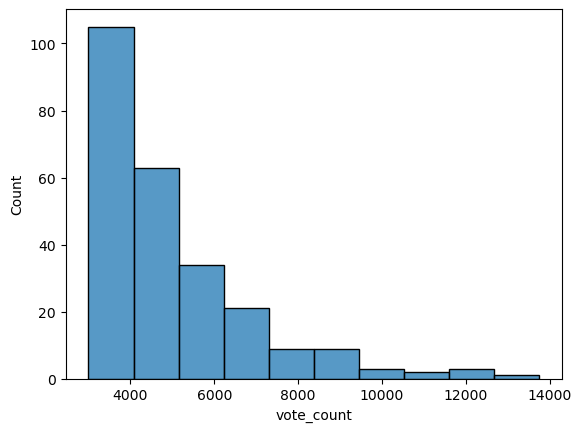

In [70]:
sns.histplot(top_250['vote_count'],bins  =10)
plt.show()

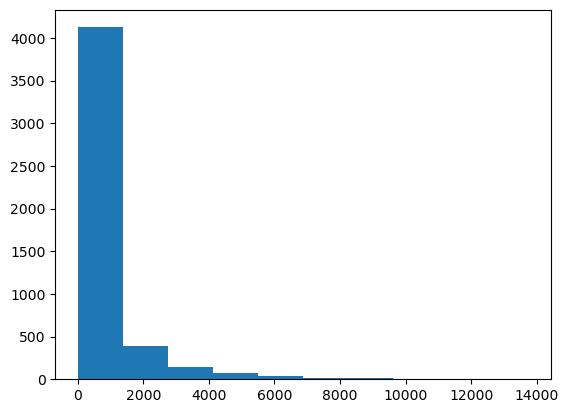

In [71]:
plt.hist(df['vote_count'],bins  =10)
plt.show()

In [72]:
df.columns

Index(['budget', 'genres', 'id', 'keywords', 'original_language',
       'original_title', 'overview', 'popularity', 'production_companies',
       'production_countries', 'release_date', 'revenue', 'runtime',
       'spoken_languages', 'status', 'title', 'vote_average', 'vote_count',
       'movie_id', 'cast', 'crew', 'Actor1', 'Actor2', 'Actor3', 'Director',
       'year', 'month', 'No_of_Genres', 'No_of_keywords',
       'overview_word_count', 'budget_in_mn', 'revenue_in_mn'],
      dtype='object')

Weighted Rating (WV)= (votes ÷ (votes + min votes)) × R + (min votes ÷ (votes+ min votes)) × C

R = Mean of Movie ratings
Votes = Total no. votes for the movie
min votes = The minimum number of votes needed to secure a place in the Top 250
C = The average (mean) vote for a movie


In [73]:
# function to creae a new columns weighted average
c = np.mean(df['vote_average'])
M = df['vote_count'].quantile(0.75)


def weighted_rating(row):

  v = row['vote_count']
  R = row['vote_average']
  WV  = ((v*R) + (M*c))/(v+M)
  return WV

In [74]:
M

738.0

In [75]:
np.max(top_250['vote_count'])

13752

In [76]:
df['weighted_rating'] = df[['vote_count','vote_average']].apply(weighted_rating, axis  = 1) # Creating a new col from above function

In [77]:
df[['vote_average','weighted_rating']].head()

,vote_average,weighted_rating
0,7.2,7.134931
1,6.9,6.786514
2,6.3,6.270861
3,7.6,7.487135
4,6.1,6.098589


In [78]:
df.head()

,budget,genres,id,keywords,original_language,original_title,overview,popularity,production_companies,production_countries,...,Actor3,Director,year,month,No_of_Genres,No_of_keywords,overview_word_count,budget_in_mn,revenue_in_mn,weighted_rating
0,237000000,"[Action, Adventure, Fantasy, Science Fiction]",19995,"[culture clash, future, space war, space colon...",en,Avatar,"In the 22nd century, a paraplegic Marine is di...",150.437577,"[Ingenious Film Partners, Twentieth Century Fo...","[United States of America, United Kingdom]",...,Sigourney Weaver,[James Cameron],2009.0,12.0,4,21,28,237.0,2787.965087,7.134931
1,300000000,"[Adventure, Fantasy, Action]",285,"[ocean, drug abuse, exotic island, east india ...",en,Pirates of the Caribbean: At World's End,"Captain Barbossa, long believed to be dead, ha...",139.082615,"[Walt Disney Pictures, Jerry Bruckheimer Films...",[United States of America],...,Keira Knightley,[Gore Verbinski],2007.0,5.0,3,16,34,300.0,961.000000,6.786514
2,245000000,"[Action, Adventure, Crime]",206647,"[spy, based on novel, secret agent, sequel, mi...",en,Spectre,A cryptic message from Bond’s past sends him o...,107.376788,"[Columbia Pictures, Danjaq, B24]","[United Kingdom, United States of America]",...,Léa Seydoux,[Sam Mendes],2015.0,10.0,3,7,41,245.0,880.674609,6.270861
3,250000000,"[Action, Crime, Drama, Thriller]",49026,"[dc comics, crime fighter, terrorist, secret i...",en,The Dark Knight Rises,Following the death of District Attorney Harve...,112.312950,"[Legendary Pictures, Warner Bros., DC Entertai...",[United States of America],...,Gary Oldman,[Christopher Nolan],2012.0,7.0,4,21,65,250.0,1084.939099,7.487135
4,260000000,"[Action, Adventure, Science Fiction]",49529,"[based on novel, mars, medallion, space travel...",en,John Carter,"John Carter is a war-weary, former military ca...",43.926995,[Walt Disney Pictures],[United States of America],...,Samantha Morton,[Andrew Stanton],2012.0,3.0,3,16,55,260.0,284.139100,6.098589


In [79]:
top_250 = top_250.copy()
top_250['weighted_rating'] = top_250[['vote_count','vote_average']].apply(weighted_rating, axis  = 1)

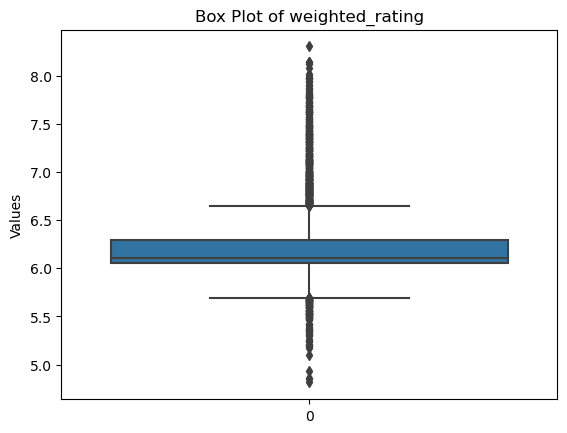

In [80]:
sns.boxplot(data=df['weighted_rating'])
plt.title('Box Plot of weighted_rating')
plt.ylabel('Values')
plt.show()

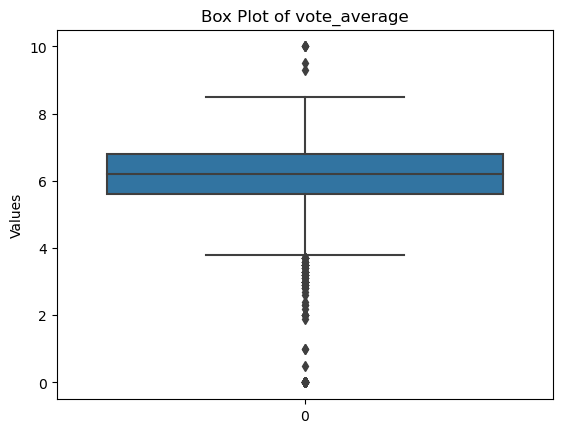

In [81]:
sns.boxplot(data=df['vote_average'])
plt.title('Box Plot of vote_average')
plt.ylabel('Values')
plt.show()

* Issue of Outliers in vote_average seems to have sorted by implementing Truw bayesin Estimate

In [82]:
df[df['weighted_rating'] > 8].shape

(6, 33)

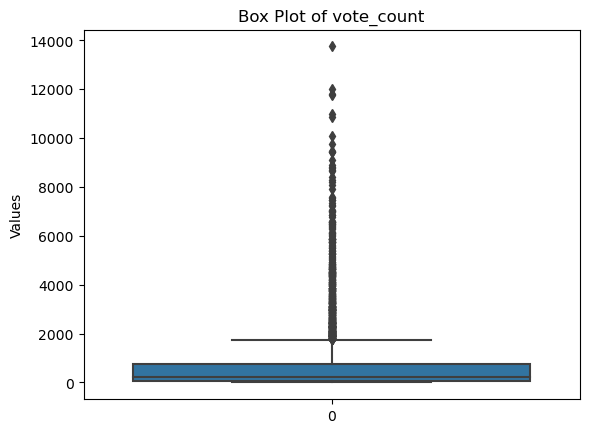

In [83]:
sns.boxplot(data=df['vote_count'])
plt.title('Box Plot of vote_count')
plt.ylabel('Values')
plt.show()

In [84]:
top_250['vote_count'].max()

13752

In [85]:
df.isnull().sum()

budget                  0
genres                  0
id                      0
keywords                0
original_language       0
original_title          0
overview                0
popularity              0
production_companies    0
production_countries    0
release_date            0
revenue                 0
runtime                 0
spoken_languages        0
status                  0
title                   0
vote_average            0
vote_count              0
movie_id                0
cast                    0
crew                    0
Actor1                  0
Actor2                  0
Actor3                  0
Director                0
year                    0
month                   0
No_of_Genres            0
No_of_keywords          0
overview_word_count     0
budget_in_mn            0
revenue_in_mn           0
weighted_rating         0
dtype: int64

In [86]:
df[df['No_of_Genres'] ==0]

,budget,genres,id,keywords,original_language,original_title,overview,popularity,production_companies,production_countries,...,Actor3,Director,year,month,No_of_Genres,No_of_keywords,overview_word_count,budget_in_mn,revenue_in_mn,weighted_rating
3976,0,[],191229,[],en,Iguana,A grotesquely disfigured harpooner called Igua...,0.214704,[],[],...,Michael Madsen,[Monte Hellman],1988.0,4.0,0,0,62,0.000000,0.00000,6.094399
3997,0,[],346081,[],en,Sardaarji,A ghost hunter uses bottles to capture trouble...,0.296981,[],[India],...,NAN,[Rohit Jugraj],2015.0,6.0,0,0,9,0.000000,0.00000,6.103731
4073,0,[],371085,[],en,Sharkskin,The Post War II story of Manhattan born Mike E...,0.027801,[],[],...,NAN,[],2015.0,1.0,0,0,42,0.000000,0.00000,6.094527
4110,2000000,[],48382,[],en,"The Book of Mormon Movie, Volume 1: The Journey",The story of Lehi and his wife Sariah and thei...,0.031947,[],[],...,NAN,[],2003.0,9.0,0,0,135,2.000000,1.67273,6.091568
4123,0,[],325140,[],en,Hum To Mohabbat Karega,"Raju, a waiter, is in love with the famous TV ...",0.001186,[],[],...,NAN,[],2000.0,5.0,0,0,109,0.000000,0.00000,6.094527
4299,1,[],357834,[],en,The Algerian,The Algerian is an international political thr...,0.025364,[Zelko Films],"[Algeria, United States of America]",...,Harry Lennix,[Giovanni Zelko],2015.0,8.0,0,0,48,0.000001,0.00000,6.094527
4320,1200000,[],137955,[],en,Crowsnest,"In late summer of 2011, five young friends on ...",0.057564,[],[Canada],...,NAN,[],2012.0,1.0,0,0,40,1.200000,0.00000,6.073814
4391,0,[],206412,[],en,Lisa Picard Is Famous,A documentarian decides to follow the career o...,0.690089,[],[],...,Griffin Dunne,[Griffin Dunne],2000.0,5.0,0,0,53,0.000000,0.00000,6.091692
4406,0,[],219716,[],en,Sparkler,Melba is a Californian trailer-park girl who i...,0.547654,[],[],...,Freddie Prinze Jr.,[Darren Stein],1999.0,3.0,0,0,55,0.000000,0.00000,6.086280
4419,0,[],335874,[],en,Childless,Katherine is a typical teenager. Today's her f...,0.243853,[],[United States of America],...,Diane Venora,[Charlie Levi],2015.0,4.0,0,0,46,0.000000,0.00000,6.090217


* Some Columns in the dataset doesnot have  both Genres and keywords, Let us remove them from dataset

* Observed that these same coloumns are also missing some other key cols like keywords, Production companies and Countries

In [87]:
df = df[df['No_of_Genres'] >0]

In [88]:
df.shape

(4778, 33)

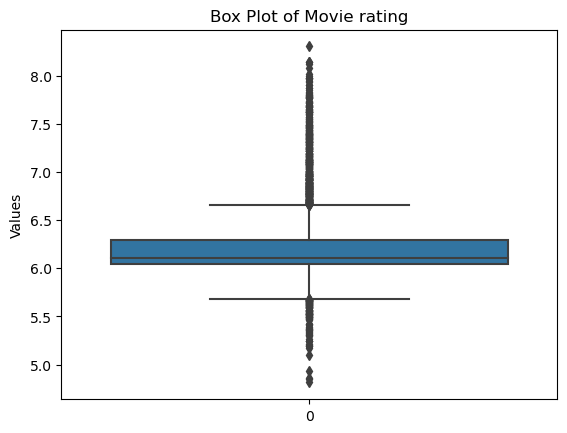

In [89]:
sns.boxplot(data=df['weighted_rating'])
plt.title('Box Plot of Movie rating')
plt.ylabel('Values')
plt.show()

* After checking above plots, let us say, ratings anything below 5.6 are Low, Between 5.6 and 6.8 are Mediuma and rest are high

In [90]:
def Rating_range(score):
    if score < 5:
        return "LOW_VOTE_AVG"
    elif score >= 7:
        return "HIGH_VOTE_AVG"
    else:
      return "MEDIUM_VOTE_AVG"

df['Rating_Range'] = df["vote_average"].apply(Rating_range)

In [91]:
df[['Rating_Range','vote_average']].head()

,Rating_Range,vote_average
0,HIGH_VOTE_AVG,7.2
1,MEDIUM_VOTE_AVG,6.9
2,MEDIUM_VOTE_AVG,6.3
3,HIGH_VOTE_AVG,7.6
4,MEDIUM_VOTE_AVG,6.1


In [92]:
df['Rating_Range'].value_counts()

MEDIUM_VOTE_AVG    3288
HIGH_VOTE_AVG       984
LOW_VOTE_AVG        506
Name: Rating_Range, dtype: int64

In [93]:
df_copy = df.copy()

In [94]:
#Creating columns new_genres,new_production_countries,new_production_companies,New_spoken_languages by converting the list to string
# These new columns will be used in EDA
df_copy['new_genres'] = df['genres'].apply(lambda x:",".join(x))
df_copy['new_genres'] = df_copy['new_genres'].apply(lambda col: col.replace(' ', '').lower())

df_copy['new_production_countries'] = df['production_countries'].apply(lambda x:",".join(x))
df_copy.new_production_countries = df_copy['new_production_countries'].apply(lambda col: col.replace(' ', '').lower())

df_copy['new_production_companies'] = df['production_companies'].apply(lambda x:",".join(x))
df['new_production_companies'] = df_copy['new_production_companies'].apply(lambda col: col.replace(' ', '').lower())


df_copy['New_spoken_languages'] = df['spoken_languages'].apply(lambda x:",".join(x))
df_copy['New_spoken_languages'] = df_copy['New_spoken_languages'].apply(lambda col: col.replace(' ', '').lower())





df_copy.head()

,budget,genres,id,keywords,original_language,original_title,overview,popularity,production_companies,production_countries,...,No_of_keywords,overview_word_count,budget_in_mn,revenue_in_mn,weighted_rating,Rating_Range,new_genres,new_production_countries,new_production_companies,New_spoken_languages
0,237000000,"[Action, Adventure, Fantasy, Science Fiction]",19995,"[culture clash, future, space war, space colon...",en,Avatar,"In the 22nd century, a paraplegic Marine is di...",150.437577,"[Ingenious Film Partners, Twentieth Century Fo...","[United States of America, United Kingdom]",...,21,28,237.0,2787.965087,7.134931,HIGH_VOTE_AVG,"action,adventure,fantasy,sciencefiction","unitedstatesofamerica,unitedkingdom","Ingenious Film Partners,Twentieth Century Fox ...","english,español"
1,300000000,"[Adventure, Fantasy, Action]",285,"[ocean, drug abuse, exotic island, east india ...",en,Pirates of the Caribbean: At World's End,"Captain Barbossa, long believed to be dead, ha...",139.082615,"[Walt Disney Pictures, Jerry Bruckheimer Films...",[United States of America],...,16,34,300.0,961.000000,6.786514,MEDIUM_VOTE_AVG,"adventure,fantasy,action",unitedstatesofamerica,"Walt Disney Pictures,Jerry Bruckheimer Films,S...",english
2,245000000,"[Action, Adventure, Crime]",206647,"[spy, based on novel, secret agent, sequel, mi...",en,Spectre,A cryptic message from Bond’s past sends him o...,107.376788,"[Columbia Pictures, Danjaq, B24]","[United Kingdom, United States of America]",...,7,41,245.0,880.674609,6.270861,MEDIUM_VOTE_AVG,"action,adventure,crime","unitedkingdom,unitedstatesofamerica","Columbia Pictures,Danjaq,B24","français,english,español,italiano,deutsch"
3,250000000,"[Action, Crime, Drama, Thriller]",49026,"[dc comics, crime fighter, terrorist, secret i...",en,The Dark Knight Rises,Following the death of District Attorney Harve...,112.312950,"[Legendary Pictures, Warner Bros., DC Entertai...",[United States of America],...,21,65,250.0,1084.939099,7.487135,HIGH_VOTE_AVG,"action,crime,drama,thriller",unitedstatesofamerica,"Legendary Pictures,Warner Bros.,DC Entertainme...",english
4,260000000,"[Action, Adventure, Science Fiction]",49529,"[based on novel, mars, medallion, space travel...",en,John Carter,"John Carter is a war-weary, former military ca...",43.926995,[Walt Disney Pictures],[United States of America],...,16,55,260.0,284.139100,6.098589,MEDIUM_VOTE_AVG,"action,adventure,sciencefiction",unitedstatesofamerica,Walt Disney Pictures,english


In [95]:
#Creating column New director by converting the list to string
df_copy['New_Director'] = df['Director'].apply(lambda x:",".join(x))
df_copy['New_Director'] = df_copy['New_Director'].apply(lambda col: col.replace(' ', '').lower())

In [96]:
#Checkig the latest movies in the dataset
df[['movie_id','release_date','title']].sort_values(by ='release_date',ascending = False).head(10)

,movie_id,release_date,title
4260,426469,2017-02-03,Growing Up Smith
3411,325373,2016-10-02,Two Lovers and a Bear
3305,374461,2016-09-16,Mr. Church
3252,385736,2016-09-09,Kicks
4726,339408,2016-09-09,The Birth of a Nation
4041,332285,2016-09-02,Antibirth
2275,184341,2016-08-26,Hands of Stone
357,271969,2016-08-17,Ben-Hur
3016,294272,2016-08-10,Pete's Dragon
72,297761,2016-08-02,Suicide Squad


## **EDA -2**

In [97]:
df_copy.columns

Index(['budget', 'genres', 'id', 'keywords', 'original_language',
       'original_title', 'overview', 'popularity', 'production_companies',
       'production_countries', 'release_date', 'revenue', 'runtime',
       'spoken_languages', 'status', 'title', 'vote_average', 'vote_count',
       'movie_id', 'cast', 'crew', 'Actor1', 'Actor2', 'Actor3', 'Director',
       'year', 'month', 'No_of_Genres', 'No_of_keywords',
       'overview_word_count', 'budget_in_mn', 'revenue_in_mn',
       'weighted_rating', 'Rating_Range', 'new_genres',
       'new_production_countries', 'new_production_companies',
       'New_spoken_languages', 'New_Director'],
      dtype='object')

### **Director Vs Budgets & Revenue**

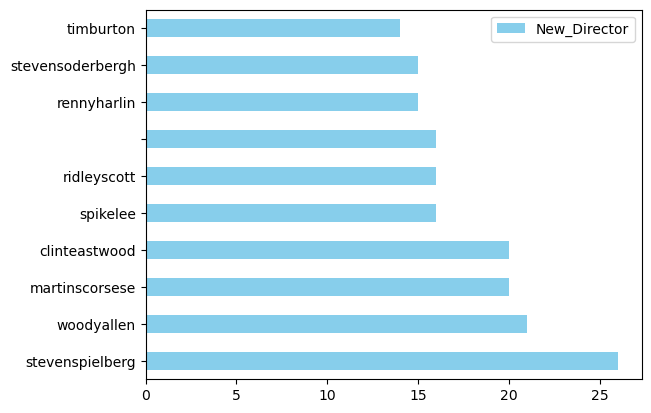

In [98]:
# movies_per_director = df_copy.groupby('New_Director')['title'].nunique()
# movies_per_director.sort_values(ascending=False).plot(kind = 'barh')
movie_counts_per_director = df_copy['New_Director'].value_counts()
top_10_directors = movie_counts_per_director.head(10)

top_10_directors.plot(kind='barh', color='skyblue')

plt.legend()

plt.show()

In [99]:
director_stats = df_copy.groupby('New_Director').agg({'budget_in_mn': 'sum', 'revenue_in_mn': 'sum'})

# Selcting directors whose overall budgets are greater than average of budgets and whose revenuw is greater than average of revenue
high_budget_high_revenue_directors = director_stats[
    (director_stats['budget_in_mn'] > director_stats['budget_in_mn'].mean()) &
    (director_stats['revenue_in_mn'] > director_stats['revenue_in_mn'].mean())
]

sorted_directors = high_budget_high_revenue_directors.sort_values(by='revenue_in_mn', ascending=False).head(10)

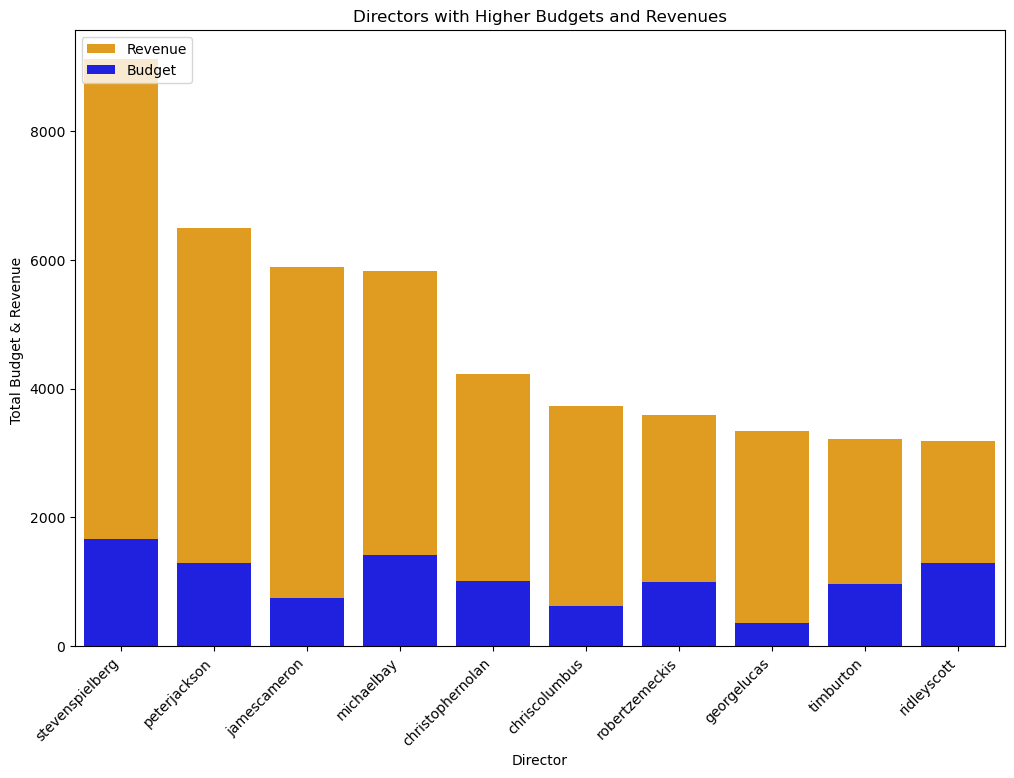

In [100]:
# Create a bar plot using Seaborn
plt.figure(figsize=(12, 8))
sns.barplot(x=sorted_directors.index, y='revenue_in_mn', data=sorted_directors, color='Orange',label='Revenue')
sns.barplot(x=sorted_directors.index, y='budget_in_mn', data=sorted_directors, color='Blue',label='Budget')

# Customize the chart
plt.title('Directors with Higher Budgets and Revenues')
plt.xlabel('Director')
plt.ylabel('Total Budget & Revenue ')

# Rotate x-axis labels for better visibility
plt.xticks(rotation=45, ha='right')

plt.legend(loc="upper left")

# Display the graph
plt.show()

* Legendary director Steven Spielberg tops the list with the highest number of movies, with more than 25 in his illustrious career.
* Following closely are Woody Allen and Martin Scorsese, also boasting a substantial number of films.

* Steven Spielberg leads not only in the number of movies but also in terms of budgets and revenue allocated to his films.
* Peter Jackson, known for directing epic franchises like "Lord of the Rings" and "The Hobbit," secures the second spot in both budgets and revenue..
* James Cameron, despite having considerably fewer movies compared to other top directors, ranks third in terms of high revenue.This underscores the significant box office impact of Cameron's directorial ventures.

### Actor1 Vs Revenue and Budgets

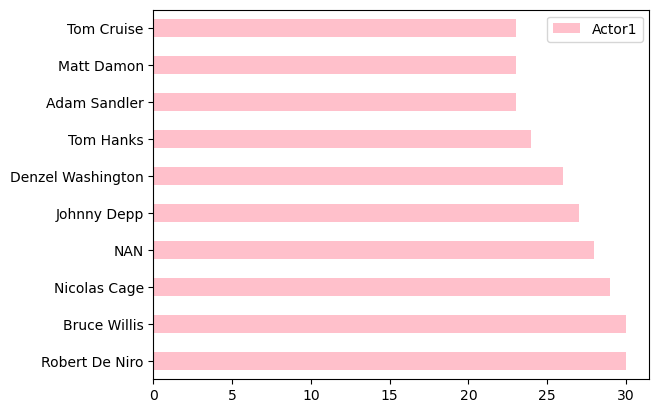

In [101]:
movie_counts_per_Actor = df_copy['Actor1'].value_counts()
top_10_Actors = movie_counts_per_Actor.head(10)

top_10_Actors.plot(kind='barh', color='pink')

plt.legend()

plt.show()

In [102]:
Actor_stats = df_copy.groupby('Actor1').agg({'budget_in_mn': 'sum', 'revenue_in_mn': 'sum'})

# Selcting directors whose overall budgets are greater than average of budgets and whose revenuw is greater than average of revenue
high_budget_high_revenue_Actors = Actor_stats[
    (Actor_stats['budget_in_mn'] > Actor_stats['budget_in_mn'].mean()) &
    (Actor_stats['revenue_in_mn'] > Actor_stats['revenue_in_mn'].mean())
]

sorted_Actors = high_budget_high_revenue_Actors.sort_values(by='revenue_in_mn', ascending=False).head(10)

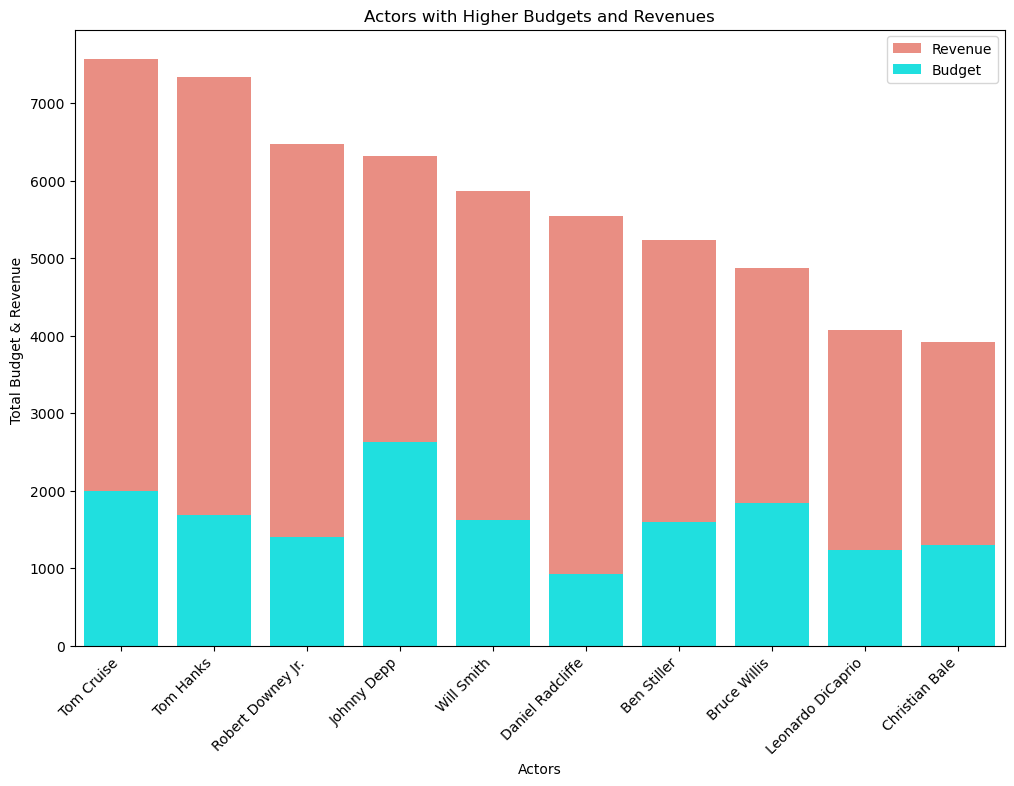

In [103]:
# Create a bar plot using Seaborn
plt.figure(figsize=(12, 8))
sns.barplot(x=sorted_Actors.index, y='revenue_in_mn', data=sorted_Actors, color='Salmon',label='Revenue')
sns.barplot(x=sorted_Actors.index, y='budget_in_mn', data=sorted_Actors, color='Aqua', label='Budget')

# Customize the chart
plt.title('Actors with Higher Budgets and Revenues')
plt.xlabel('Actors')
plt.ylabel('Total Budget & Revenue ')

# Rotate x-axis labels for better visibility
plt.xticks(rotation=45, ha='right')
plt.legend()

# Display the graph
plt.show()

### **Director Vs Ratings**

In [104]:
director_stats = df_copy.groupby('New_Director').agg({'weighted_rating': 'mean','title': 'count'})

# Selcting directors who has more than two movie
Acclaimed_Directors = director_stats[
    (director_stats['title'] > 2)
]


sorted_directors = Acclaimed_Directors.sort_values(by='weighted_rating', ascending=False).head(10)
sorted_directors

,weighted_rating,title
New_Director,,
christophernolan,7.618328,8
petedocter,7.565848,3
quentintarantino,7.542645,8
hayaomiyazaki,7.520172,4
sergioleone,7.294029,4
frankdarabont,7.216221,4
josswhedon,7.141078,3
peterjackson,7.124018,9
davidfincher,7.118599,10


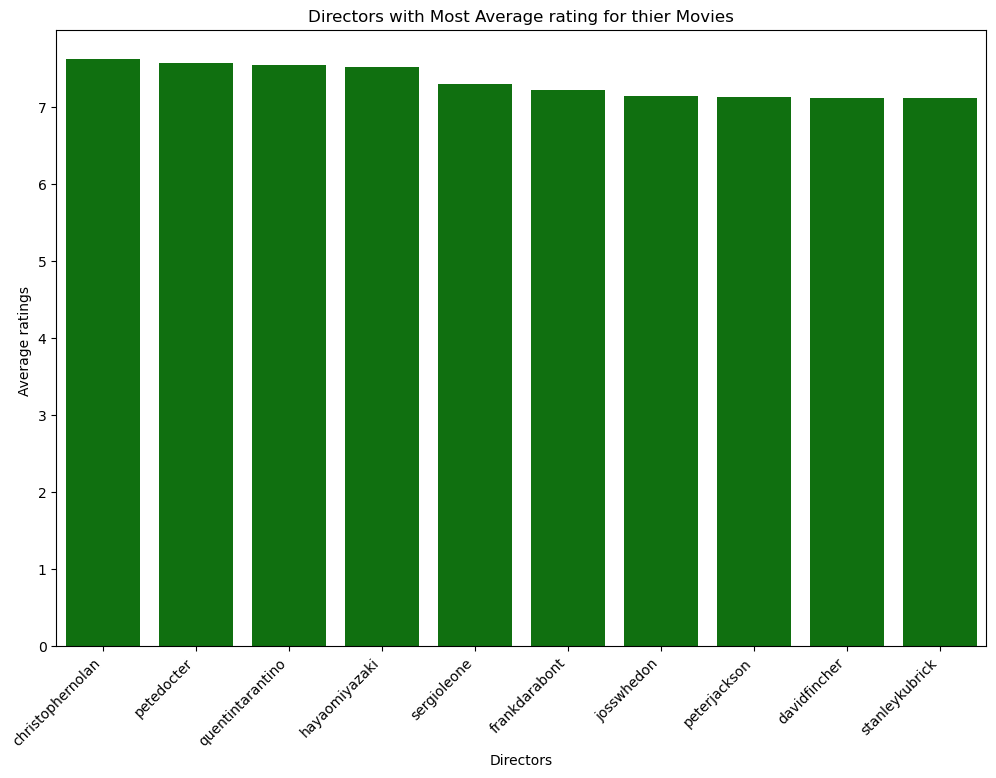

In [105]:
# Create a bar plot using Seaborn
plt.figure(figsize=(12, 8))
sns.barplot(x=sorted_directors.index, y='weighted_rating', data=sorted_directors, color='Green')

# Customize the chart
plt.title('Directors with Most Average rating for thier Movies')
plt.xlabel('Directors')
plt.ylabel('Average ratings ')

# Rotate x-axis labels for better visibility
plt.xticks(rotation=45, ha='right')


# Display the graph
plt.show()

* Among directors with more than two films, the renowned filmmaker Christopher Nolan emerges at the forefront, boasting an impressive weighted average of 7.2 for his internationally acclaimed works.

* Pete Doctor and quinrin Tat=rantino closely follow Nolan in the rankings, securing second and third positions with average ratings of 7.2 and 7.1, respectively

* Their consistent high ratings reflect the enduring impact and quality of their cinematic contributions

In [106]:
Actor_stats = df_copy.groupby('Actor1').agg({'weighted_rating': 'mean','title': 'count'})

# Selcting directors who has more than two movie
Acclaimed_Actors = Actor_stats[
    (Actor_stats['title'] > 5)
]


sorted_Actors = Acclaimed_Actors.sort_values(by='weighted_rating', ascending=False).head(10)
sorted_Actors

,weighted_rating,title
Actor1,,
Daniel Radcliffe,7.151436,7
Leonardo DiCaprio,6.932157,16
Tom Hanks,6.810132,24
Edward Norton,6.753746,8
Hugh Jackman,6.715934,10
Robert Downey Jr.,6.674241,12
Brad Pitt,6.651571,17
Chris Pine,6.649801,6
Christian Bale,6.641503,16


In [107]:
title = df_copy[['original_title','popularity','vote_count','vote_average','weighted_rating']]

sorted_title = title.sort_values(by='weighted_rating', ascending=False).head(10)
sorted_title

,original_title,popularity,vote_count,vote_average,weighted_rating
1883,The Shawshank Redemption,136.747729,8205,8.5,8.301494
3340,The Godfather,143.659698,5893,8.4,8.143411
662,Fight Club,146.757391,9413,8.3,8.139657
3235,Pulp Fiction,121.463076,8428,8.3,8.122426
65,The Dark Knight,187.322927,12002,8.2,8.078035
809,Forrest Gump,138.133331,7927,8.2,8.020676
96,Inception,167.583710,13752,8.1,7.997858
1820,Schindler's List,104.469351,4329,8.3,7.978777
3870,Whiplash,192.528841,4254,8.3,7.973950
95,Interstellar,724.247784,10867,8.1,7.972465


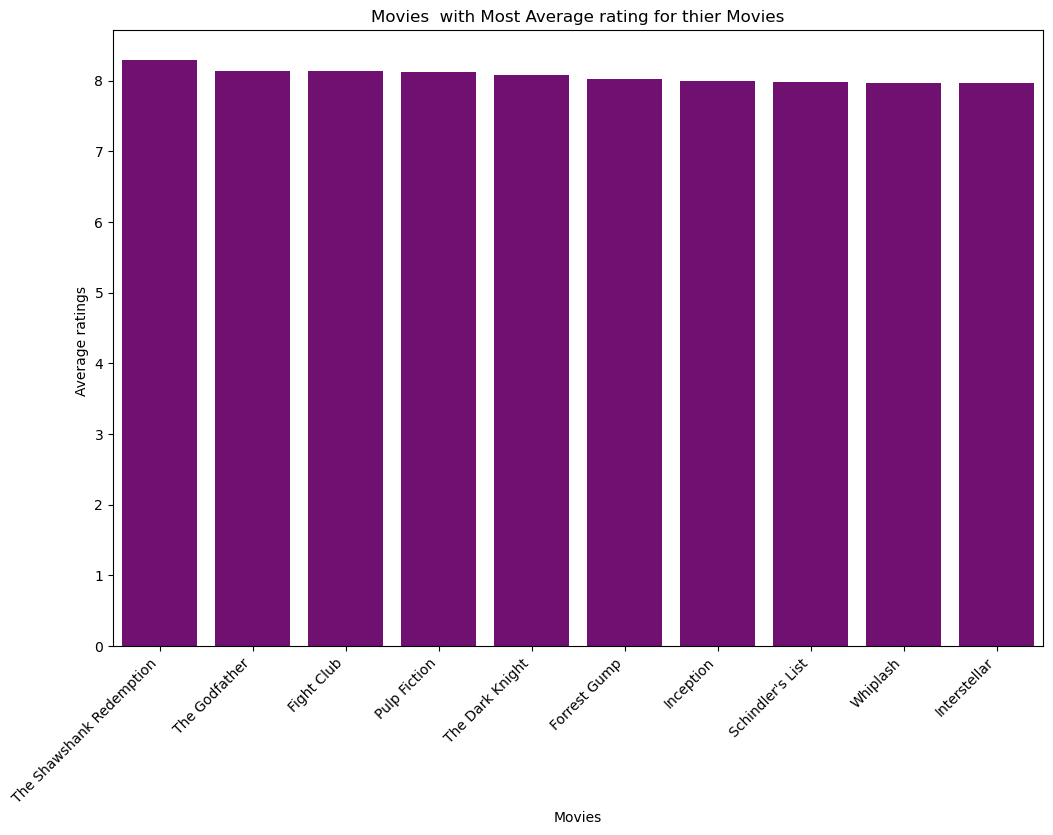

In [108]:
# Create a bar plot using Seaborn
plt.figure(figsize=(12, 8))
sns.barplot(x=sorted_title.original_title, y='weighted_rating', data=sorted_title, color='purple')

# Customize the chart
plt.title('Movies  with Most Average rating for thier Movies')
plt.xlabel('Movies')
plt.ylabel('Average ratings ')


# Rotate x-axis labels for better visibility
plt.xticks(rotation=45, ha='right')



# Display the graph
plt.show()

In [109]:
Actor_stats = df_copy.groupby('Actor1').agg({'weighted_rating': 'mean','title': 'count'})

# Selcting directors who has more than two movie
Acclaimed_Actors = Actor_stats[
    (Actor_stats['title'] > 2)
]


sorted_Actors = Acclaimed_Actors.sort_values(by='weighted_rating', ascending=False).head(10)
sorted_Actors

,weighted_rating,title
Actor1,,
Mark Hamill,7.839175,3
Chris Pratt,7.156214,3
Daniel Radcliffe,7.151436,7
Leonardo DiCaprio,6.932157,16
Martin Freeman,6.924062,3
Marlon Brando,6.901819,3
Jay Baruchel,6.900758,3
Tom Hanks,6.810132,24
Edward Norton,6.753746,8


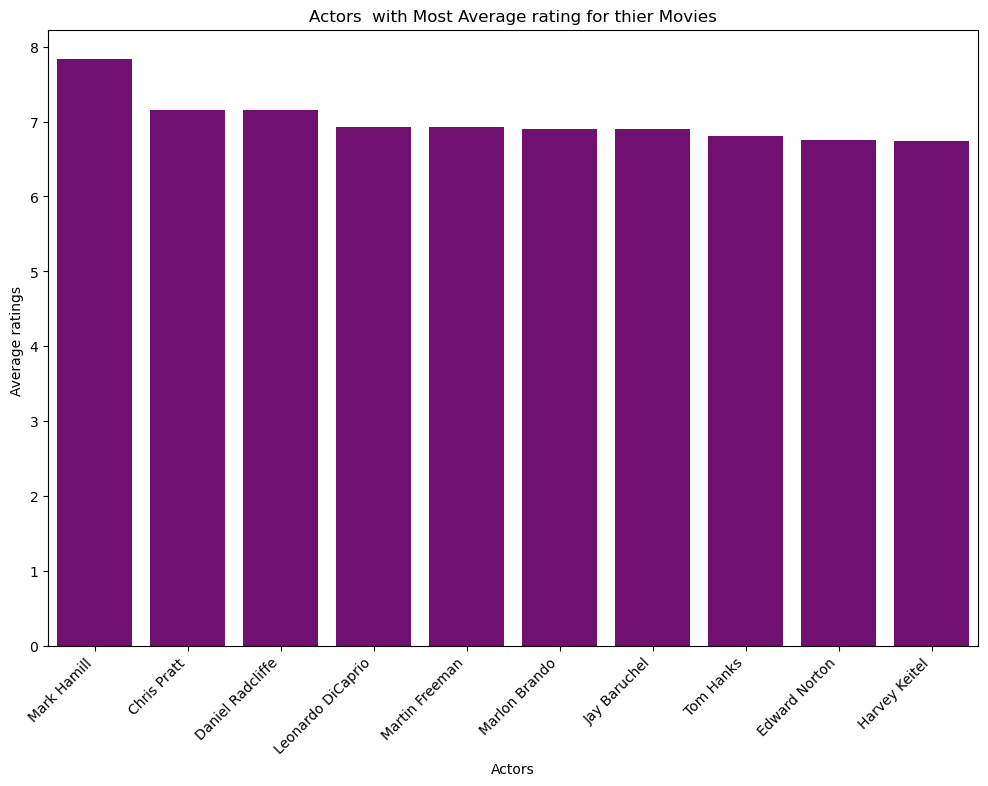

In [110]:
# Create a bar plot using Seaborn
plt.figure(figsize=(12, 8))
sns.barplot(x=sorted_Actors.index, y='weighted_rating', data=sorted_Actors, color='purple')

# Customize the chart
plt.title('Actors  with Most Average rating for thier Movies')
plt.xlabel('Actors')
plt.ylabel('Average ratings ')


# Rotate x-axis labels for better visibility
plt.xticks(rotation=45, ha='right')



# Display the graph
plt.show()

In [111]:
 df[['movie_id','title','genres','weighted_rating']].sort_values(by = 'weighted_rating',ascending =False ).head()

,movie_id,title,genres,weighted_rating
1883,278,The Shawshank Redemption,"[Drama, Crime]",8.301494
3340,238,The Godfather,"[Drama, Crime]",8.143411
662,550,Fight Club,[Drama],8.139657
3235,680,Pulp Fiction,"[Thriller, Crime]",8.122426
65,155,The Dark Knight,"[Drama, Action, Crime, Thriller]",8.078035


### Movies Vs profit

In [112]:
df_copy['profit']= df_copy['revenue'] - df_copy['budget']

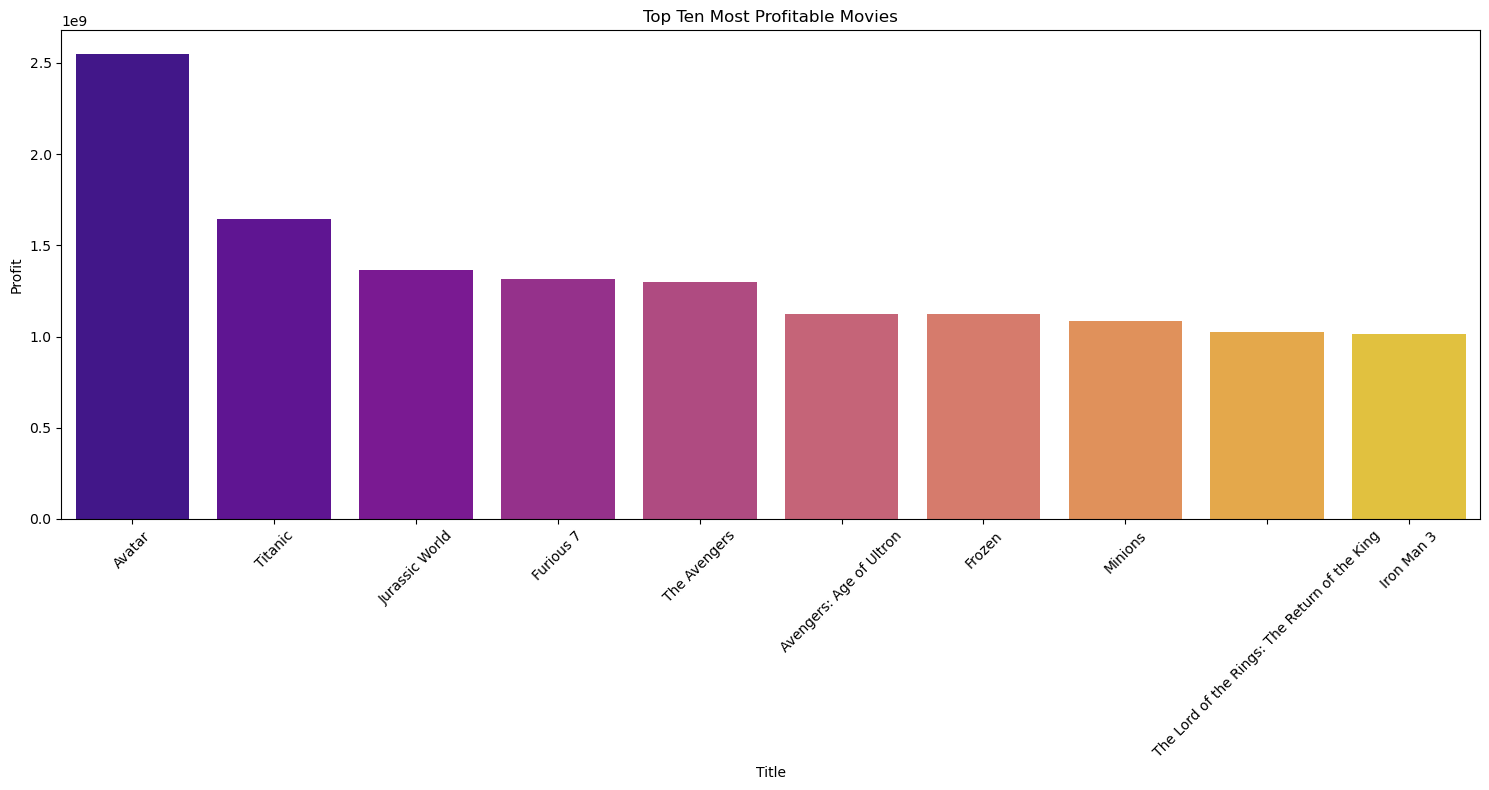

In [113]:
profitable_movies = df_copy.sort_values(by='profit', ascending=False).head(10)

# Plot the top 10 most profitable movies
plt.figure(figsize=(15, 8))
sns.barplot(x=profitable_movies['original_title'], y=profitable_movies['profit'], palette='plasma')
plt.xticks(rotation=45)
plt.title('Top Ten Most Profitable Movies')
plt.xlabel('Title')
plt.ylabel('Profit')
plt.tight_layout()
plt.show()

* Avatar and Titanic are the top two movies which generated hight profit movies followed by Jurassic World

### Genre vs Popularity

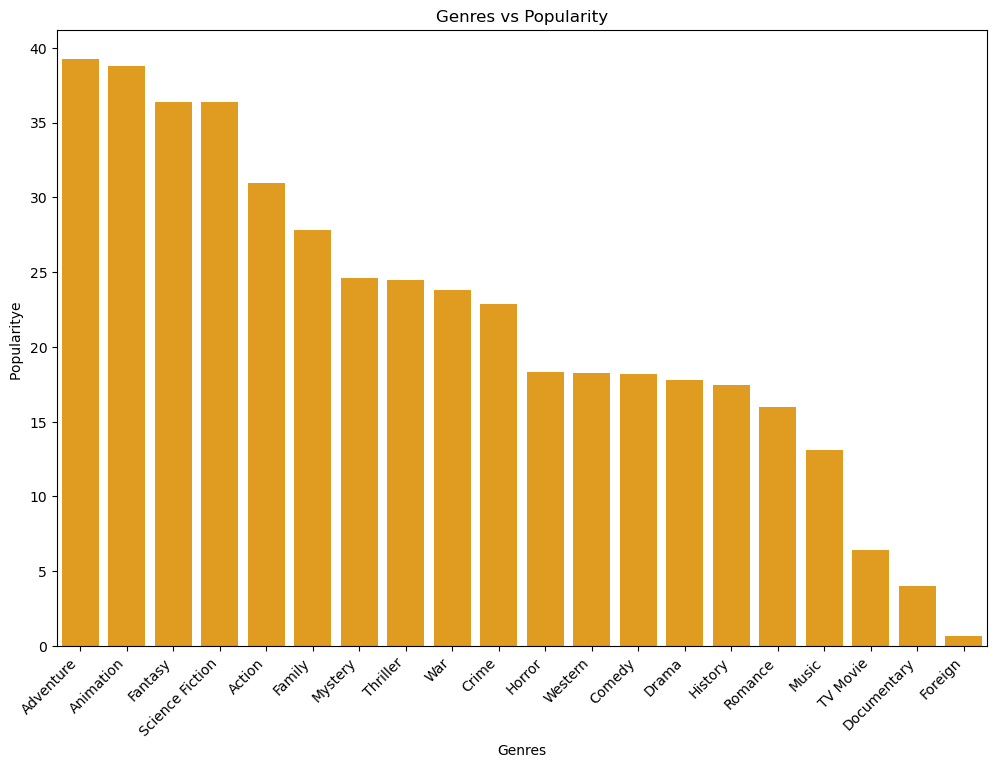

In [114]:
genre_df = df[['genres','popularity']]

# Explode the 'Genres' column to have one row per genre
exploded_df = genre_df.explode('genres')
exploded_df['popularity'] = pd.to_numeric(exploded_df['popularity'], errors='coerce')
grouped_df = exploded_df.groupby('genres')['popularity'].mean().reset_index()
sorted_df = grouped_df.sort_values(by='popularity', ascending=False)

sorted_df.head(6)


# Plotting Genre vs popularity

plt.figure(figsize=(12, 8))
sns.barplot(x=sorted_df['genres'], y='popularity', data=grouped_df, color='Orange')

# Customize the chart
plt.title('Genres vs Popularity')
plt.xlabel('Genres')
plt.ylabel('Popularitye ')

# Rotate x-axis labels for better visibility
plt.xticks(rotation=45, ha='right')



# Display the graph
plt.show()

In [164]:
target_genre = 'Action'

# Filter movies with the target genre

filtered_movies = df[df['genres'].apply(lambda genres: target_genre in genres)]
filtered_movies.shape

(1156, 35)

# HYPOTHESIS TESTING

* Columns like Overview and Keywords are obvious choice for any content based recommendation.
* Let us apply different statistical techniques for feature selection on remaining columns

### **Question**:  Is there an Association between Categorical columns with rating range
* Test: Chi-square test.
* Null Hypothesis  H0  : The ratings range is independent of Given Categorical Column.
* Alternative Hypothesis  H1: The ratings Range is associated with Given Categorical column.
* α = 0.05

In [116]:
genre_score = df_copy[["new_genres", "vote_average", "Rating_Range"]]
genre_count = genre_score.groupby("new_genres").count()["vote_average"].rename("count").sort_values(ascending=False).reset_index()

In [117]:
cont_table  = pd.crosstab(genre_score.new_genres, genre_score.Rating_Range)
cont_table

Rating_Range,HIGH_VOTE_AVG,LOW_VOTE_AVG,MEDIUM_VOTE_AVG
new_genres,,,
action,1,5,15
"action,adventure",0,1,7
"action,adventure,animation,comedy,family",0,1,1
"action,adventure,animation,comedy,family,fantasy,romance",0,0,1
"action,adventure,animation,comedy,family,fantasy,sciencefiction",0,0,1
...,...,...,...
"western,comedy",1,0,0
"western,drama",0,0,2
"western,drama,adventure,thriller",1,0,0


In [118]:
import scipy.stats
X2, p_value, degree_freedom, expected_values = scipy.stats.chi2_contingency(cont_table, correction = True)
p_value = "{:.2f}".format(p_value)
X2 = "{:.2f}".format(X2)

print("X2:",X2)
print("P-value:", p_value)

X2: 2886.77
P-value: 0.00


In [119]:
def Chi_square(df):

  categorical_variables_CHISQAURE =  ['original_language','new_genres', 'new_production_countries','new_production_companies', 'Actor1', 'Actor2','Actor3','New_Director', 'New_spoken_languages','Rating_Range']
  score = df_copy[categorical_variables_CHISQAURE]

  for i in range(len(categorical_variables_CHISQAURE)-1):
    cont_table  = pd.crosstab(score[categorical_variables_CHISQAURE[i]], score.Rating_Range)
    X2, p_value, degree_freedom, expected_values = scipy.stats.chi2_contingency(cont_table, correction = True)
    print("X2 of " ,categorical_variables_CHISQAURE[i] ,":",X2)
    print("P-value of",categorical_variables_CHISQAURE[i], ":", p_value)

    if p_value < 0.05:
      print("P value is less than 0.05, so we can reject null hypothesis and say that ratings are asscociated with", categorical_variables_CHISQAURE[i] )
    else:
      print("P value is greater than 0.05, so we cannot reject the null hypothesis and conclude that there does not exist a relationship between ratings and", categorical_variables_CHISQAURE[i] )

    print("---------------------------------------------------------------------------------------------------------------------------")




In [120]:
Chi_square(df)

X2 of  original_language : 166.4046078310888
P-value of original_language : 1.937251252976471e-09
P value is less than 0.05, so we can reject null hypothesis and say that ratings are asscociated with original_language
---------------------------------------------------------------------------------------------------------------------------
X2 of  new_genres : 2886.773954708614
P-value of new_genres : 8.65349700314875e-14
P value is less than 0.05, so we can reject null hypothesis and say that ratings are asscociated with new_genres
---------------------------------------------------------------------------------------------------------------------------
X2 of  new_production_countries : 1141.9735071804162
P-value of new_production_countries : 2.620175371300072e-06
P value is less than 0.05, so we can reject null hypothesis and say that ratings are asscociated with new_production_countries
--------------------------------------------------------------------------------------------------

In [121]:
def Chi_square1(df):

  categorical_variables_CHISQAURE =  ['original_language','new_genres', 'new_production_countries','new_production_companies', 'Actor1', 'Actor2','Actor3','New_Director', 'New_spoken_languages','Rating_Range']
  score = df_copy[categorical_variables_CHISQAURE]
    
  results = []

  for i in range(len(categorical_variables_CHISQAURE)-1):
    cont_table  = pd.crosstab(score[categorical_variables_CHISQAURE[i]], score.Rating_Range)
    X2, p_value, degree_freedom, expected_values = scipy.stats.chi2_contingency(cont_table, correction = True)
    X2 = "{:.4f}".format(X2)
    p_value = "{:.4f}".format(p_value)
    results.append({
                'Variable': categorical_variables_CHISQAURE[i],
                'X2': X2,
                'p_value': p_value
            })
  return pd.DataFrame(results)



In [122]:
Chi_square1(df)

,Variable,X2,p_value
0,original_language,166.4046,0.0000
1,new_genres,2886.7740,0.0000
2,new_production_countries,1141.9735,0.0000
3,new_production_companies,7365.5020,0.5519
4,Actor1,5433.7990,0.0000
5,Actor2,6280.1959,0.0000
6,Actor3,6711.7610,0.0000
7,New_Director,6286.1370,0.0000
8,New_spoken_languages,1141.5560,0.0338


### **Question**:  Is there an Association between Numerical columns with Vote Average
* Test: Pearson correlation test.
* Null Hypothesis  H0  : The ratings range is independent of selected Numerical Column.
* Alternative Hypothesis  H1: The ratings Range is associated with selected Numerical Column.
* α = 0.05

In [123]:
df_copy.columns

Index(['budget', 'genres', 'id', 'keywords', 'original_language',
       'original_title', 'overview', 'popularity', 'production_companies',
       'production_countries', 'release_date', 'revenue', 'runtime',
       'spoken_languages', 'status', 'title', 'vote_average', 'vote_count',
       'movie_id', 'cast', 'crew', 'Actor1', 'Actor2', 'Actor3', 'Director',
       'year', 'month', 'No_of_Genres', 'No_of_keywords',
       'overview_word_count', 'budget_in_mn', 'revenue_in_mn',
       'weighted_rating', 'Rating_Range', 'new_genres',
       'new_production_countries', 'new_production_companies',
       'New_spoken_languages', 'New_Director', 'profit'],
      dtype='object')

In [124]:
numerical_variables =  ['popularity','vote_count','budget_in_mn', 'No_of_Genres','No_of_keywords', 'overview_word_count','revenue',  'runtime','vote_average']

In [125]:
def Pearson_corr(df):

  numerical_variables =  ['popularity','vote_count','budget_in_mn', 'No_of_Genres','No_of_keywords', 'overview_word_count','revenue',  'runtime','vote_average']
  score = df_copy[numerical_variables]

  for i in range(len(numerical_variables)-1):
    r, p_value = scipy.stats.pearsonr(score[numerical_variables[i]], score['vote_average'])


    print("Pearson’s correlation coefficient for {2}: {0}, P-Value: {1}".format(r,p_value,numerical_variables[i]))


    if p_value < 0.05:
      print("P value is less than 0.05, so we can reject null hypothesis and say that ratings are asscociated with", numerical_variables[i] )
    else:
      print("P value is greater than 0.05, so we cannot reject the null hypothesis and conclude that there does not exist a relationship between ratings and", numerical_variables[i] )

    print("---------------------------------------------------------------------------------------------------------------------------")



In [126]:
Pearson_corr(df)


Pearson’s correlation coefficient for popularity: 0.2755861310147435, P-Value: 5.062654987564885e-84
P value is less than 0.05, so we can reject null hypothesis and say that ratings are asscociated with popularity
---------------------------------------------------------------------------------------------------------------------------
Pearson’s correlation coefficient for vote_count: 0.3189328189705231, P-Value: 2.0288170615862694e-113
P value is less than 0.05, so we can reject null hypothesis and say that ratings are asscociated with vote_count
---------------------------------------------------------------------------------------------------------------------------
Pearson’s correlation coefficient for budget_in_mn: 0.08381307035726161, P-Value: 6.548472520362401e-09
P value is less than 0.05, so we can reject null hypothesis and say that ratings are asscociated with budget_in_mn
-------------------------------------------------------------------------------------------------------

In [127]:
def Pearson_corr1(df):

  numerical_variables =  ['popularity','vote_count','budget_in_mn', 'No_of_Genres','No_of_keywords', 'overview_word_count','revenue',  'runtime','vote_average']
  score = df_copy[numerical_variables]
  results = []
  for i in range(len(numerical_variables)-1):
    r, p_value = scipy.stats.pearsonr(score[numerical_variables[i]], score['vote_average'])


    r = "{:.4f}".format(r)
    p_value = "{:.4f}".format(p_value)
    results.append({
                'Variable': numerical_variables[i],
                'r': r,
                'p_value': p_value
            })
  
  return pd.DataFrame(results)


In [128]:
Pearson_corr1(df)

,Variable,r,p_value
0,popularity,0.2756,0.0000
1,vote_count,0.3189,0.0000
2,budget_in_mn,0.0838,0.0000
3,No_of_Genres,0.0459,0.0015
4,No_of_keywords,0.2819,0.0000
5,overview_word_count,-0.0036,0.8032
6,revenue,0.1980,0.0000
7,runtime,0.3488,0.0000


* Chi-Sqaure Test have selected  ['original_language','new_genres', 'new_production_countries', 'Actor1', 'Actor2','Actor3','New_Director', 'New_spoken_languages']

* Pearson’s correlation coefficient have selected ['popularity','vote_count','budget_in_mn', 'No_of_Genres','No_of_keywords','revenue',  'runtime']

# **Modelling**

In [129]:
categorical  = ['keywords','overview','original_language','genres', 'production_companies', 'cast','Director', 'spoken_languages']

In [130]:
numerical =  ['popularity','vote_count','budget_in_mn', 'No_of_Genres','No_of_keywords','revenue', 'runtime']

* Let us add all Categorical cols as tags for recomemndation

In [131]:
df['keywords'][0]

['culture clash',
 'future',
 'space war',
 'space colony',
 'society',
 'space travel',
 'futuristic',
 'romance',
 'space',
 'alien',
 'tribe',
 'alien planet',
 'cgi',
 'marine',
 'soldier',
 'battle',
 'love affair',
 'anti war',
 'power relations',
 'mind and soul',
 '3d']

In [132]:
new_df = df[['movie_id','title','keywords','overview','original_language','genres', 'production_companies', 'cast','Director', 'spoken_languages','popularity','vote_count','budget', 'No_of_Genres','No_of_keywords','revenue', 'runtime','vote_average']]
new_df.head()

,movie_id,title,keywords,overview,original_language,genres,production_companies,cast,Director,spoken_languages,popularity,vote_count,budget,No_of_Genres,No_of_keywords,revenue,runtime,vote_average
0,19995,Avatar,"[culture clash, future, space war, space colon...","In the 22nd century, a paraplegic Marine is di...",en,"[Action, Adventure, Fantasy, Science Fiction]","[Ingenious Film Partners, Twentieth Century Fo...","[Sam Worthington, Zoe Saldana, Sigourney Weave...",[James Cameron],"[English, Español]",150.437577,11800,237000000,4,21,2787965087,162.0,7.2
1,285,Pirates of the Caribbean: At World's End,"[ocean, drug abuse, exotic island, east india ...","Captain Barbossa, long believed to be dead, ha...",en,"[Adventure, Fantasy, Action]","[Walt Disney Pictures, Jerry Bruckheimer Films...","[Johnny Depp, Orlando Bloom, Keira Knightley, ...",[Gore Verbinski],[English],139.082615,4500,300000000,3,16,961000000,169.0,6.9
2,206647,Spectre,"[spy, based on novel, secret agent, sequel, mi...",A cryptic message from Bond’s past sends him o...,en,"[Action, Adventure, Crime]","[Columbia Pictures, Danjaq, B24]","[Daniel Craig, Christoph Waltz, Léa Seydoux, R...",[Sam Mendes],"[Français, English, Español, Italiano, Deutsch]",107.376788,4466,245000000,3,7,880674609,148.0,6.3
3,49026,The Dark Knight Rises,"[dc comics, crime fighter, terrorist, secret i...",Following the death of District Attorney Harve...,en,"[Action, Crime, Drama, Thriller]","[Legendary Pictures, Warner Bros., DC Entertai...","[Christian Bale, Michael Caine, Gary Oldman, A...",[Christopher Nolan],[English],112.312950,9106,250000000,4,21,1084939099,165.0,7.6
4,49529,John Carter,"[based on novel, mars, medallion, space travel...","John Carter is a war-weary, former military ca...",en,"[Action, Adventure, Science Fiction]",[Walt Disney Pictures],"[Taylor Kitsch, Lynn Collins, Samantha Morton,...",[Andrew Stanton],[English],43.926995,2124,260000000,3,16,284139100,132.0,6.1


In [133]:
from nltk.corpus import stopwords
from nltk.stem.porter import PorterStemmer

stop_words = set(stopwords.words('english'))
stemmer = PorterStemmer()

#Function to apply preprocessing steps
def preprocessing_step1(list1):
  list1 = [words.lower() for words in list1]
  list1 = [words.replace(' ', '') for words in list1]
  list1 = [words for words in list1 if not words in stop_words]
  list1 = [stemmer.stem(words) for words in list1]
  return list1



In [134]:
new_df['keywords'] = new_df['keywords'].apply(preprocessing_step1)
new_df['genres'] = new_df['genres'].apply(preprocessing_step1)

In [135]:
# For  'production_companies', 'cast','Director' and  'spoken_languages we just need to remove spaces and convert them to lower

def preprocessing2(list1):
  list1 = [words.lower() for words in list1]
  list1 = [words.replace(' ', '') for words in list1]
  return list1

new_df['production_companies'] = new_df['production_companies'].apply(preprocessing2)
new_df['cast'] = new_df['cast'].apply(preprocessing2)
new_df['Director'] = new_df['Director'].apply(preprocessing2)
new_df['spoken_languages'] = new_df['spoken_languages'].apply(preprocessing2)
new_df['original_language'] = new_df['original_language'].apply(preprocessing2)


In [136]:
new_df.head()

,movie_id,title,keywords,overview,original_language,genres,production_companies,cast,Director,spoken_languages,popularity,vote_count,budget,No_of_Genres,No_of_keywords,revenue,runtime,vote_average
0,19995,Avatar,"[cultureclash, futur, spacewar, spacecoloni, s...","In the 22nd century, a paraplegic Marine is di...","[e, n]","[action, adventur, fantasi, sciencefict]","[ingeniousfilmpartners, twentiethcenturyfoxfil...","[samworthington, zoesaldana, sigourneyweaver, ...",[jamescameron],"[english, español]",150.437577,11800,237000000,4,21,2787965087,162.0,7.2
1,285,Pirates of the Caribbean: At World's End,"[ocean, drugabus, exoticisland, eastindiatradi...","Captain Barbossa, long believed to be dead, ha...","[e, n]","[adventur, fantasi, action]","[waltdisneypictures, jerrybruckheimerfilms, se...","[johnnydepp, orlandobloom, keiraknightley, ste...",[goreverbinski],[english],139.082615,4500,300000000,3,16,961000000,169.0,6.9
2,206647,Spectre,"[spi, basedonnovel, secretag, sequel, mi6, bri...",A cryptic message from Bond’s past sends him o...,"[e, n]","[action, adventur, crime]","[columbiapictures, danjaq, b24]","[danielcraig, christophwaltz, léaseydoux, ralp...",[sammendes],"[français, english, español, italiano, deutsch]",107.376788,4466,245000000,3,7,880674609,148.0,6.3
3,49026,The Dark Knight Rises,"[dccomic, crimefight, terrorist, secretident, ...",Following the death of District Attorney Harve...,"[e, n]","[action, crime, drama, thriller]","[legendarypictures, warnerbros., dcentertainme...","[christianbale, michaelcaine, garyoldman, anne...",[christophernolan],[english],112.312950,9106,250000000,4,21,1084939099,165.0,7.6
4,49529,John Carter,"[basedonnovel, mar, medallion, spacetravel, pr...","John Carter is a war-weary, former military ca...","[e, n]","[action, adventur, sciencefict]",[waltdisneypictures],"[taylorkitsch, lynncollins, samanthamorton, wi...",[andrewstanton],[english],43.926995,2124,260000000,3,16,284139100,132.0,6.1


In [137]:
# Let us Preprocess the 'overview' column

new_df['overview'] = new_df['overview'].apply(lambda x: x.split())
new_df['overview'] = new_df['overview'].apply(preprocessing_step1)

In [138]:
new_df.head()

,movie_id,title,keywords,overview,original_language,genres,production_companies,cast,Director,spoken_languages,popularity,vote_count,budget,No_of_Genres,No_of_keywords,revenue,runtime,vote_average
0,19995,Avatar,"[cultureclash, futur, spacewar, spacecoloni, s...","[22nd, century,, parapleg, marin, dispatch, mo...","[e, n]","[action, adventur, fantasi, sciencefict]","[ingeniousfilmpartners, twentiethcenturyfoxfil...","[samworthington, zoesaldana, sigourneyweaver, ...",[jamescameron],"[english, español]",150.437577,11800,237000000,4,21,2787965087,162.0,7.2
1,285,Pirates of the Caribbean: At World's End,"[ocean, drugabus, exoticisland, eastindiatradi...","[captain, barbossa,, long, believ, dead,, come...","[e, n]","[adventur, fantasi, action]","[waltdisneypictures, jerrybruckheimerfilms, se...","[johnnydepp, orlandobloom, keiraknightley, ste...",[goreverbinski],[english],139.082615,4500,300000000,3,16,961000000,169.0,6.9
2,206647,Spectre,"[spi, basedonnovel, secretag, sequel, mi6, bri...","[cryptic, messag, bond’, past, send, trail, un...","[e, n]","[action, adventur, crime]","[columbiapictures, danjaq, b24]","[danielcraig, christophwaltz, léaseydoux, ralp...",[sammendes],"[français, english, español, italiano, deutsch]",107.376788,4466,245000000,3,7,880674609,148.0,6.3
3,49026,The Dark Knight Rises,"[dccomic, crimefight, terrorist, secretident, ...","[follow, death, district, attorney, harvey, de...","[e, n]","[action, crime, drama, thriller]","[legendarypictures, warnerbros., dcentertainme...","[christianbale, michaelcaine, garyoldman, anne...",[christophernolan],[english],112.312950,9106,250000000,4,21,1084939099,165.0,7.6
4,49529,John Carter,"[basedonnovel, mar, medallion, spacetravel, pr...","[john, carter, war-weary,, former, militari, c...","[e, n]","[action, adventur, sciencefict]",[waltdisneypictures],"[taylorkitsch, lynncollins, samanthamorton, wi...",[andrewstanton],[english],43.926995,2124,260000000,3,16,284139100,132.0,6.1


In [139]:
# Let us create new coloumn 'tags' by adding all categorical cols
tag1 = new_df['overview']+ new_df['keywords'] + new_df['genres'] + new_df['production_companies'] + new_df['cast']  + new_df['Director'] + new_df['spoken_languages']
tag2 = new_df['overview']+ new_df['keywords']
tag3 = new_df['overview']+ new_df['keywords'] + new_df['genres']
tag4 = new_df['cast']+new_df['overview']+ new_df['keywords'] + new_df['genres']
tag5 = new_df['keywords']
tag6  = new_df['overview']

In [140]:
#Converting list of tags to string
tag1 = tag1.apply(lambda x: " ".join(x))
tag2  = tag2.apply(lambda x: " ".join(x))
tag3  = tag3.apply(lambda x: " ".join(x))
tag4  = tag4.apply(lambda x: " ".join(x))
tag5  = tag5.apply(lambda x: " ".join(x))
tag6  = tag6.apply(lambda x: " ".join(x))


In [141]:
tag1[0]

'22nd century, parapleg marin dispatch moon pandora uniqu mission, becom torn follow order protect alien civilization. cultureclash futur spacewar spacecoloni societi spacetravel futurist romanc space alien tribe alienplanet cgi marin soldier battl loveaffair antiwar powerrel mindandsoul 3d action adventur fantasi sciencefict ingeniousfilmpartners twentiethcenturyfoxfilmcorporation duneentertainment lightstormentertainment samworthington zoesaldana sigourneyweaver stephenlang jamescameron english español'

In [142]:
df[numerical] = df[numerical].astype(str)
tag7= tag1 + new_df['budget'].astype(str)+ ' ' + new_df['No_of_Genres'].astype(str)+ " "+ new_df['No_of_keywords'].astype(str)+ " "+ new_df['revenue'].astype(str)+" " + new_df['runtime'].astype(str)

In [143]:
tag7[0]

'22nd century, parapleg marin dispatch moon pandora uniqu mission, becom torn follow order protect alien civilization. cultureclash futur spacewar spacecoloni societi spacetravel futurist romanc space alien tribe alienplanet cgi marin soldier battl loveaffair antiwar powerrel mindandsoul 3d action adventur fantasi sciencefict ingeniousfilmpartners twentiethcenturyfoxfilmcorporation duneentertainment lightstormentertainment samworthington zoesaldana sigourneyweaver stephenlang jamescameron english español237000000 4 21 2787965087 162.0'

In [145]:
# Create a TfidfVectorizer for text feature extraction
tfidf = TfidfVectorizer(max_features=5000,stop_words='english')

# Calculate the TF-IDF features from the 'text' column of the dataset
tags_vector1 = tfidf.fit_transform(tag1)
tags_vector2 = tfidf.fit_transform(tag2)
tags_vector3 = tfidf.fit_transform(tag3)
tags_vector4 = tfidf.fit_transform(tag4)
tags_vector5 = tfidf.fit_transform(tag5)
tags_vector6 = tfidf.fit_transform(tag6)
tags_vector7 = tfidf.fit_transform(tag7)


In [146]:
# generating Similarity scores for all vectors
similarity1 = cosine_similarity(tags_vector1)
similarity2 = cosine_similarity(tags_vector2)
similarity3 = cosine_similarity(tags_vector3)
similarity4 = cosine_similarity(tags_vector4)
similarity5 = cosine_similarity(tags_vector5)
similarity6 = cosine_similarity(tags_vector6)
similarity7 = cosine_similarity(tags_vector7)


In [147]:
similarity2[-1]

array([0.        , 0.        , 0.        , ..., 0.        , 0.03012987,
       1.        ])

In [148]:
# Function to generate Recommended movies and Similarity score
def recommend_movies(movie,weight):
  movie_index = new_df[new_df['title']== movie].index[0]
  similarity_matrices = {
        1: similarity1,
        2: similarity2,
        3: similarity3,
        4: similarity4,
        5: similarity5,
        6: similarity6,
        7: similarity7,


    }
  if weight not in similarity_matrices:
        raise ValueError("Weight must be in the range 1 to 9")

  distances = similarity_matrices[weight][movie_index]
  my_list = sorted(list(enumerate(distances)), reverse=True, key=lambda x: x[1])[1:6]

  recommendations = [new_df.iloc[i[0]].title for i in my_list]
  scores = [i[1] for i in my_list]

  return recommendations, scores





In [149]:
new_df['title'].head(25)

0                                          Avatar
1        Pirates of the Caribbean: At World's End
2                                         Spectre
3                           The Dark Knight Rises
4                                     John Carter
5                                    Spider-Man 3
6                                         Tangled
7                         Avengers: Age of Ultron
8          Harry Potter and the Half-Blood Prince
9              Batman v Superman: Dawn of Justice
10                               Superman Returns
11                              Quantum of Solace
12     Pirates of the Caribbean: Dead Man's Chest
13                                The Lone Ranger
14                                   Man of Steel
15       The Chronicles of Narnia: Prince Caspian
16                                   The Avengers
17    Pirates of the Caribbean: On Stranger Tides
18                                 Men in Black 3
19      The Hobbit: The Battle of the Five Armies


In [150]:
def get_best_score(movie):
    result_list = []

    for i in range(1, 8):
        data = pd.DataFrame({
            'Title': recommend_movies(movie, i)[0],
            'Score': recommend_movies(movie, i)[1],
            'id': i
        })
        result_list.append(data)

    # Concatenate all DataFrames in the list
    result_df = pd.concat(result_list, ignore_index=True)

    return result_df




In [151]:
get_best_score("Spider-Man 3")

,Title,Score,id
0,Spider-Man,0.553914,1
1,Spider-Man 2,0.497590,1
2,Arachnophobia,0.326598,1
3,The Amazing Spider-Man 2,0.311498,1
4,The Amazing Spider-Man,0.291256,1
5,Spider-Man,0.474276,2
6,Spider-Man 2,0.425032,2
7,Arachnophobia,0.357508,2
8,The Amazing Spider-Man,0.297067,2
9,The Amazing Spider-Man 2,0.294876,2


In [152]:
get_best_score("Pirates of the Caribbean: At World's End")

,Title,Score,id
0,Pirates of the Caribbean: Dead Man's Chest,0.455293,1
1,Pirates of the Caribbean: The Curse of the Bla...,0.314338,1
2,Pirates of the Caribbean: On Stranger Tides,0.225578,1
3,"20,000 Leagues Under the Sea",0.172407,1
4,Life of Pi,0.156201,1
5,Pirates of the Caribbean: Dead Man's Chest,0.241139,2
6,Life of Pi,0.193180,2
7,"20,000 Leagues Under the Sea",0.185548,2
8,Pirates of the Caribbean: On Stranger Tides,0.173371,2
9,The Pirates! In an Adventure with Scientists!,0.168914,2


In [153]:
get_best_score("Avatar")

,Title,Score,id
0,Falcon Rising,0.234822,1
1,Aliens,0.229564,1
2,Aliens vs Predator: Requiem,0.224796,1
3,Meet Dave,0.204099,1
4,Battle: Los Angeles,0.198011,1
5,Falcon Rising,0.217152,2
6,Aliens,0.214149,2
7,Battle: Los Angeles,0.187805,2
8,Apollo 18,0.173160,2
9,Meet Dave,0.162454,2


In [154]:
get_best_score("Tangled")

,Title,Score,id
0,Out of Inferno,0.229737,1
1,Gulliver's Travels,0.195604,1
2,Ant-Man,0.171832,1
3,Man on Wire,0.168300,1
4,The Walk,0.157372,1
5,Gulliver's Travels,0.256013,2
6,Out of Inferno,0.217298,2
7,The Walk,0.176592,2
8,Ant-Man,0.172109,2
9,TRON: Legacy,0.155238,2


In [155]:
df.columns

Index(['budget', 'genres', 'id', 'keywords', 'original_language',
       'original_title', 'overview', 'popularity', 'production_companies',
       'production_countries', 'release_date', 'revenue', 'runtime',
       'spoken_languages', 'status', 'title', 'vote_average', 'vote_count',
       'movie_id', 'cast', 'crew', 'Actor1', 'Actor2', 'Actor3', 'Director',
       'year', 'month', 'No_of_Genres', 'No_of_keywords',
       'overview_word_count', 'budget_in_mn', 'revenue_in_mn',
       'weighted_rating', 'Rating_Range', 'new_production_companies'],
      dtype='object')

In [156]:
def recommend_movies_with_weight(movie,weight= [1,1,1,1,1,1,1]):
     tag = weight[0]*new_df['overview']+ weight[1]*new_df['keywords'] + weight[2]*new_df['genres'] + weight[3]*new_df['production_companies'] + weight[4]*new_df['cast'] + weight[5]*new_df['Director'] +weight[6]*new_df['spoken_languages']
     tag1 = tag.apply(lambda x: " ".join(x))
     tags_vector = tfidf.fit_transform(tag1)
     similarity = cosine_similarity(tags_vector)
     
     movie_index = new_df[new_df['title']== movie].index[0]
     distances = similarity[movie_index]
     my_list = sorted(list(enumerate(distances)), reverse=True, key=lambda x: x[1])[1:6]

     recommendations = [new_df.iloc[i[0]].title for i in my_list]
     scores = [i[1] for i in my_list]

     return pd.DataFrame({'movies':recommendations, 'similarity':scores})
    
    
    
     

In [157]:
#Adding weight to the columsn "overview"
recommend_movies_with_weight("Spider-Man 3",[10,1,1,1,1,1,1])

,movies,similarity
0,Spider-Man,0.377689
1,Spider-Man 2,0.365290
2,The Amazing Spider-Man,0.322087
3,Arachnophobia,0.294222
4,The Amazing Spider-Man 2,0.269742


In [158]:
#Adding weight to the columsn "keywords"
recommend_movies_with_weight("Spider-Man 3",[1,10,1,1,1,1,1])

,movies,similarity
0,Spider-Man 2,0.436828
1,Spider-Man,0.317146
2,Two Lovers,0.279928
3,The One,0.277445
4,"You, Me and Dupree",0.260012


In [159]:
#Adding weight to the columsn "genres"
recommend_movies_with_weight("Interstellar",[1,1,10,1,1,1,1])

,movies,similarity
0,Midnight Special,0.686867
1,"20,000 Leagues Under the Sea",0.659696
2,Silent Running,0.653914
3,The Martian,0.642118
4,Allegiant,0.603162


In [160]:
#Adding weight to the columsn "production comapnies"
recommend_movies_with_weight("Spider-Man 3",[1,1,1,10,1,1,1])

,movies,similarity
0,Spider-Man 2,0.939975
1,Spider-Man,0.691102
2,The Amazing Spider-Man 2,0.638798
3,The Amazing Spider-Man,0.570096
4,The Butler,0.430725


In [161]:
#Adding weight to the columsn "cast"
recommend_movies_with_weight("Spider-Man 3",[1,1,1,1,10,1,1])

,movies,similarity
0,Spider-Man,0.739748
1,Spider-Man 2,0.719084
2,Flyboys,0.307386
3,We Bought a Zoo,0.304024
4,Labor Day,0.301475


In [162]:
#Adding weight to the columsn "Director"
recommend_movies_with_weight("Spider-Man 3",[1,1,1,1,1,10,1])

,movies,similarity
0,Spider-Man,0.896990
1,Spider-Man 2,0.873730
2,The Quick and the Dead,0.807635
3,The Evil Dead,0.806518
4,Oz: The Great and Powerful,0.794840


In [163]:
#Adding weight to the columsn "Spoken languages"
recommend_movies_with_weight("Spider-Man 3",[1,1,1,1,1,1,10])

,movies,similarity
0,Pink Narcissus,0.607907
1,The House of Mirth,0.599088
2,Nighthawks,0.585881
3,Not Easily Broken,0.577682
4,The Face of an Angel,0.559921


### Conclusion from Above Experiments

* Tag1 created by using features selected from Chi-square test is best tag when compared to other tags.
* tag7 created by using all categoricaland Numerical columns selected from tests Chi-square and Pearson test is also performing on par with tag1 on an average when compared to 5 movies


* But Simalarity score was exponentally better when weighted tags implemented.
* Simalarity score is on heigher side when 10 weights added to "production comapnies", "Director", "genres"
* But based on the domain knowledge, it is advised to use the tag created by addidng 10 weights to genres columns